# SWE402 Data Mining - Assignmenrt
## <b>Comparing LightGBM and XGBoost tree-based algorithms for fraud detection task on "Bank Account Fraud Dataset Suite (NeurIPS 2022)" datasets</b>
### -- Group 1
Group Members: 
<ul>
  <li>SWE2009498 He Lintao</li>
  <li>SWE1909615 Wan Jiale</li>
  <li>CST2004270 Ng Zhun Keat</li>
  <li>SWE2009494 Cheng Xianran</li>
  <li>SWE2009509 Lin Meiru</li>
</ul>
<a id="top"></a>

## Table of Content

- 1. [Introduction](#1-introduction)<br>
    - 1.1 [Importance of Fraud Detection](#11)<br>
    - 1.2 [Objective](#12)<br>
- 2. [Dataset Description and Reference](#2)<br>
    - 2.1 [Introduction of the dataset](#21)<br>
    - 2.2 [Dataset Source](#22)<br>
    - 2.3 [Attribute Description](#23)<br>
- 3. [Descriptive with Code](#3) <br>
    - 3.1 [Explore Combined Data](#31)<br>
    - 3.2 [Preprocessing Combined Data](#32)<br>
    - 3.3 [Feature Engineering for Fraud Detection of Bank Account Applications](#33)<br>
    - 3.4 [Feature Selection for Fraud Detection of Bank Account Applications](#34)<br>
    - 3.5 [Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications](#35)<br>
        - 3.5.1 [Fraud Detection Model Training Functions using Oversampling and Search CV](#351)<br>
        - 3.5.2 [Fraud Detection Model Testing Functions](#352)<br>
        - 3.5.3 [Check and final preprocessed data for training](#353)<br>
        - 3.5.4 [Choose Oversampler with CatBoost and 5:5 training and test dataset](#354)<br>
        - 3.5.5 [**LightGBM training and evaluation**](#355)<br>
        - 3.5.6 [**XGBoost training and evaluation**](#356)<br>
        - 3.5.7 [**Model Evaluation for Fraud Detection**](#357)
- 4. [Challenges and Problems]()<br>
- 5. [Conclusion / Findings](#5-conclusion--findings)<br>
- [Reference](#6)<br>

<a id="1"></a>
# **1. Introduction**

### **1.1 Importance of Fraud Detection**
<a id="11"></a>

Fraud is a big problem for banks and financial institutions. Every year, billions of dollars are lost to fraudsters who find ways to exploit weaknesses in the system. As a result, in recent years banks have begun to use a variety of methods for fraud detection. Such behavior can bring these main benefits: 

<ol>
    <li>Protecting the rights and interests of users and minimizing their financial losses.</li>
    <li>Improve the credibility of the bank and gain the trust of consumers.</li>
    <li>Data security is further improved by analyzing fraudulent behavior.</li>
    <li>Increase the competitiveness of the bank's business and attract more customers and partners.</li>
</ol>

In the data-driven era, where fraud tactics are constantly changing, fraud detection through advanced technology and continuous analytical learning has become extraordinarily important.

### **1.2 Objective**
<a id="12"></a>

<ul>
    <li>Aplly resampling techniques to deal with imbalanced problem of fraud detection task and datasets</li>
    <li>Compare different 3 oversampling methods (SMOTE, ADASYN, SMOTENC) in the combined dataset, to know which one is more suitable for the dataset</li>
    <li>Conduct feature engineering and then select best feature for train and evaluate modesls</li>
    <li>Compare performace of LightGBM and XGBoost under preprocessed combined dataset in the fraud detection task</li>
</ul>

<a id="2"></a>
# **2. Dataset Description and Reference**

### <b>2.1 Introduction of the dataset</b><a class="anchor" id="21-introductio-of-dataset"></a>
<a id="21"></a>

The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it contains a total of 6 different synthetic bank account fraud tabular datasets. The dataset contains a total of 30 features used in the fraud detection use-case and 1 milion instances.

The dataset consists of information on protected attributes for a fair ML evaluation, such as :age group, employment status and % income. In addition, it also contains a column of "month", where it provides actual months about the original dataset to allow for temporal validation

For each different variant of the dataset, they are slightly different compared to the base variant with differences such as higher group size disparity, higher prevalence disparity, better separability, higher prevalence disparity in train and better separability in train for one of the groups

### <b> 2.2 Dataset Source </b><a class="anchor" id="22-dataset-source"></a>

<ul>
    <li><a href="https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022">https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022</a?</li>
</ul>

### **2.3 Attribute Description**
<a id="23"></a>

<table>
    <tr>
        <th>Attribute Name</th>
        <th>Data Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>fraud_bool</td>
        <td>Int</td>
        <td>Fraud label (1 if fraud, 0 if legit)</td>
    </tr>
    <tr>
        <td>income</td>
        <td>Float</td>
        <td>Annual income of the applicant in quantiles. Ranges between [0, 1].</td>
    </tr>
    <tr>
        <td>name_email_similarity</td>
        <td>Float</td>
        <td>Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].</td>
    </tr>
    <tr>
        <td>prev_address_months_count</td>
        <td>Int</td>
        <td>: Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).</td>
    </tr>
    <tr>
        <td>current_address_months_count</td>
        <td>Int</td>
        <td>Months in currently registered address of the applicant. Ranges between [−1, 406] months (-1 is a missing value).</td>
    </tr>
    <tr>
        <td>customer_age</td>
        <td>Int</td>
        <td>Applicant’s age in bins per decade (e.g, 20-29 is represented as 20).</td>
    </tr>
    <tr>
        <td>days_since_request</td>
        <td>Float</td>
        <td>Number of days passed since application was done. Ranges between [0, 78] days.</td>
    </tr>
    <tr>
        <td>intended_balcon_amount</td>
        <td>Float</td>
        <td>Initial transferred amount for application. Ranges between [−1, 108].</td>
    </tr>
    <tr>
        <td>payment_type</td>
        <td>Object</td>
        <td>Credit payment plan type. 5 possible (annonymized) values.</td>
    </tr>
    <tr>
        <td>zip_count_4w</td>
        <td>Int</td>
        <td>Number of applications within same zip code in last 4 weeks. Ranges between [1, 5767].</td>
    </tr>
    <tr>
        <td>velocity_6h</td>
        <td>Float</td>
        <td>Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−211, 24763].</td>
    </tr>
    <tr>
        <td>velocity_24h</td>
        <td>Float</td>
        <td>Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1329, 9527].</td>
    </tr>
    <tr>
        <td>velocity_4w</td>
        <td>Float</td>
        <td>Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2521].</td>
    </tr><tr>
        <td>bank_branch_count_8w</td>
        <td>Int</td>
        <td>Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2779, 7043].</td>
    </tr>
    <tr>
        <td>date_of_birth_distinct_emails_4w</td>
        <td>Int</td>
        <td>Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 42].</td>
    </tr>
    <tr>
        <td>employment_status</td>
        <td>Object</td>
        <td>Employment status of the applicant. 7 possible (annonymized) values.</td>
    </tr>
    <tr>
        <td>credit_risk_score</td>
        <td>Int</td>
        <td>Internal score of application risk. Ranges between [−176, 387].</td>
    </tr>
    <tr>
        <td>email_is_free</td>
        <td>Int</td>
        <td>Domain of application email (either free or paid).</td>
    </tr>
    <tr>
        <td>housing_status</td>
        <td>Object</td>
        <td>Current residential status for applicant. 7 possible (annonymized) values.</td>
    </tr>
    <tr>
        <td>phone_home_valid</td>
        <td>Int</td>
        <td>Validity of provided home phone.</td>
    </tr>
    <tr>
        <td>phone_mobile_valid</td>
        <td>Int</td>
        <td>Validity of provided mobile phone.</td>
    </tr>
    <tr>
        <td>bank_months_count</td>
        <td>Int</td>
        <td>How old is previous account (if held) in months. Ranges between [−1, 31] months (-1 is a missing value).</td>
    </tr>
    <tr>
        <td>has_other_cards</td>
        <td>Int</td>
        <td>If applicant has other cards from the same banking company.</td>
    </tr>
    <tr>
        <td>proposed_credit_limit</td>
        <td>Float</td>
        <td>Applicant’s proposed credit limit. Ranges between [200, 2000].</td>
    </tr>
    <tr>
        <td>foreign_request</td>
        <td>Int</td>
        <td>If origin country of request is different from bank’s country.</td>
    </tr>
     <tr>
        <td>source</td>
        <td>Object</td>
        <td>Online source of application. Either browser(INTERNET) or mobile app (APP).</td>
    </tr>
     <tr>
        <td>session_length_in_minutes</td>
        <td>Int</td>
        <td>Length of user session in banking website in minutes. Ranges between [−1, 107] minutes</td>
    </tr>
     <tr>
        <td>device_os</td>
        <td>Object</td>
        <td>Operative system of device that made request. Possible values are: Windows, Macintox, Linux, X11, or other.</td>
    </tr>
     <tr>
        <td>keep_alive_session</td>
        <td>Int</td>
        <td>User option on session logout.</td>
    </tr>
     <tr>
        <td>device_distinct_emails_8w</td>
        <td>Int</td>
        <td>Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3].</td>
    </tr>
     <tr>
        <td>device_fraud_count</td>
        <td>Int</td>
        <td>Number of fraudulent applications with used device. Ranges between [0, 1].</td>
    </tr>
     <tr>
        <td>month</td>
        <td>Int</td>
        <td>Month where the application was made. Ranges between [0, 7].</td>
    </tr>
    <tr>
        <td>x1</td>
        <td>Float</td>
        <td>Synthetic feature added to increase separability bias</td>
    </tr>
    <tr>
        <td>x2</td>
        <td>Float</td>
        <td>Synthetic feature added to increase separability bias</td>
    </tr>
</table>

<a id="3"></a>
# **3. Descriptive with Code**

###### Set Up

In [1]:
# try:
#     import pycaret
# except:
#     !pip install pycaret

###### Load basic Python libraries for data pocessing</b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)     

###### Read data from CSV files</b>

In [3]:
# folder = 'archive/'
data1 = pd.read_csv("Base.csv")
data2 = pd.read_csv("Variant I.csv")
data3 = pd.read_csv("Variant II.csv")
data4 = pd.read_csv("Variant III.csv")
data5 = pd.read_csv("Variant IV.csv")
data6 = pd.read_csv("Variant V.csv")

###### Combine all data into one dataframe</b>

In [4]:
combined_data = pd.concat([data1,data2,data3,data4,data5,data6],ignore_index=True)

<a id="31"></a>

## 3.1. Explore Combined Data

In the process of data mining, it is important to understand the data in depth. This step not only allows the developer to get a good look at the data and understand the actual problem represented behind it, but also to further assess the quality of the data and learn about their characteristics such as data type. What is observed in this process will have a great impact on the subsequent data preprocessing, feature engineering, and model selection. Thus, the pre-exploration of data can be considered the cornerstone of data mining, laying the groundwork for later steps.

In [5]:
# Show the first 10 rows of the combined data
combined_data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7,NaN,NaN
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7,NaN,NaN
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7,NaN,NaN
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7,NaN,NaN
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7,NaN,NaN
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7,NaN,NaN
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272,1,BA,1,1,30,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7,NaN,NaN
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83,1,BB,1,0,28,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7,NaN,NaN
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222,0,BA,1,1,30,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7,NaN,NaN
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118,1,BC,0,1,25,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7,NaN,NaN


###### Show each attribute name of the combined datasets

In [6]:
print(combined_data.columns)

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month', 'x1', 'x2'],
      dtype='object')


###### Show the type of each column

In [7]:
combined_data.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [8]:
print("Number of rows:", combined_data.shape[0])
print("Number of columns:", combined_data.shape[1])

Number of rows: 6000000
Number of columns: 34


###### Display smmarised information of the combined data

In [9]:
# display summary information of combined data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   fraud_bool                        int64  
 1   income                            float64
 2   name_email_similarity             float64
 3   prev_address_months_count         int64  
 4   current_address_months_count      int64  
 5   customer_age                      int64  
 6   days_since_request                float64
 7   intended_balcon_amount            float64
 8   payment_type                      object 
 9   zip_count_4w                      int64  
 10  velocity_6h                       float64
 11  velocity_24h                      float64
 12  velocity_4w                       float64
 13  bank_branch_count_8w              int64  
 14  date_of_birth_distinct_emails_4w  int64  
 15  employment_status                 object 
 16  credit_risk_score                 in

###### Get number of unique values in each column of the combined data, 

In [10]:
# Get the number of unique values in each column of the combined data
combined_data.nunique()

fraud_bool                                2
income                                    9
name_email_similarity               2851749
prev_address_months_count               380
current_address_months_count            429
customer_age                              9
days_since_request                  2774836
intended_balcon_amount              2820050
payment_type                              5
zip_count_4w                           6438
velocity_6h                         2850954
velocity_24h                        2853020
velocity_4w                         2847484
bank_branch_count_8w                   2362
date_of_birth_distinct_emails_4w         40
employment_status                         7
credit_risk_score                       561
email_is_free                             2
housing_status                            7
phone_home_valid                          2
phone_mobile_valid                        2
bank_months_count                        33
has_other_cards                 

###### Compute a summary of statistics pertaining to the combined_data DataFrame columns 

In [11]:
#calculate count,mean,std,min,25%,50&,75% and max of combined data
combined_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,6000000.0,0.011029,0.104441,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,6000000.0,0.572429,0.289144,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,6000000.0,0.489952,0.290644,5.024707e-08,0.218291,0.488681,0.754922,1.000000
prev_address_months_count,6000000.0,15.432901,43.399144,-1.000000e+00,-1.000000,-1.000000,9.000000,399.000000
current_address_months_count,6000000.0,94.531254,92.245038,-1.000000e+00,24.000000,59.000000,146.000000,429.000000
customer_age,6000000.0,38.500277,13.664382,1.000000e+01,30.000000,40.000000,50.000000,90.000000
days_since_request,6000000.0,0.952534,5.156853,4.036860e-09,0.007352,0.015490,0.026718,78.456904
intended_balcon_amount,6000000.0,8.613258,20.435470,-1.573989e+01,-1.179817,-0.832233,1.377613,113.120051
zip_count_4w,6000000.0,1544.539356,986.356616,1.000000e+00,891.000000,1230.000000,1891.000000,6830.000000
velocity_6h,6000000.0,5580.443473,2975.478457,-1.741097e+02,3388.732166,5264.386116,7528.194709,16817.838935


###### Generate discreptive statistics for the attibutes as object or bool type

In [12]:
#get information of data types which are object and bool
combined_data.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,6000000,5,AB,2328127
employment_status,6000000,7,CA,4205660
housing_status,6000000,7,BC,2099833
source,6000000,2,INTERNET,5955260
device_os,6000000,5,linux,2012206


###### Compare fraud and no fraud rows of data in the combined dataset

In [13]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
# Show the number of fraud cases
fraud_vals = combined_data['fraud_bool'].value_counts()
print(fraud_vals)

0    5933823
1      66177
Name: fraud_bool, dtype: int64


In [14]:
# Wrap fraud_vals Series in a DataFrame
fraud_vals = fraud_vals.to_frame().reset_index()
# Rename the columns
fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
# Print the updated DataFrame
print(fraud_vals)

   fraud_bool    count
0           0  5933823
1           1    66177


In [15]:
# Define custom color palette
my_palette = sns.color_palette("pastel", 2)
sns.set_style("whitegrid")

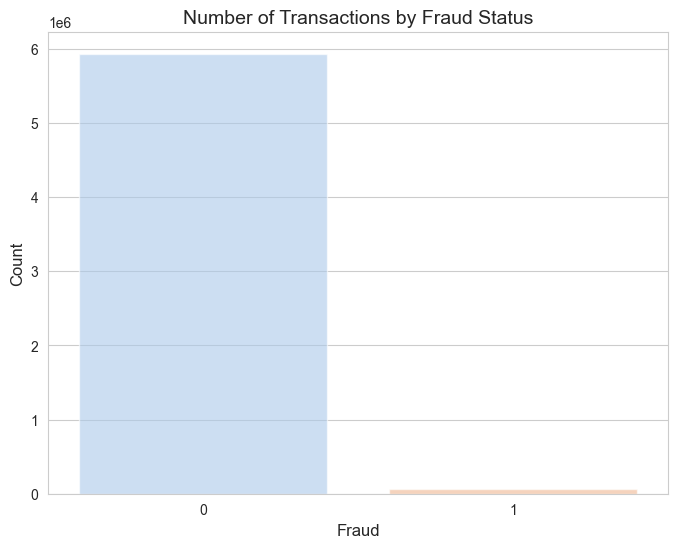

In [16]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

The above results 1 represents the data of fraud, and 0 represents the data of no fraud. Obviously, the number of no fraud is far more than that of fraud, which obviously shows the imbalance of the combinde fraud detection dataset.
<br>

<br>
<span style="font-size: 20px;font-weight:bold">Based on the above series of steps for exploring the data, we can now understand this information:</span>
<br><br>
<ol>
   <li>The first ten rows of data in the combined data which will help us to understand the actual data under the corresponding columns, and better the meaning of these columns in practice.</li>
   <br>
   <li>All the features in combined_data, which can help us further understand the dataset.</li>
   <br>
   <li> The data type of each column of data in combin_data that helps us to better understand each feature and to determine if any of the columns are inappropriately data-typed and need to be converted.</li>
   <br>
   <li> Understand the number of unique values under each feature. This information can help us further to know the distribution of data under each column.</li>
   <br>
   <li> Knowing the mean, maximum, and minimum values of each feature helps us to take a comprehensive look at the entire data set and get a picture of the distribution of the data.</li>
   <br>
   <li> Understand the amount of fraudulent and non-fraudulent data in the entire dataset to better understand the core objectives of this data mining.</li>
</ol>



<a id="32"></a>

## 3.2 Preprocessing Combined Data

### 3.2.1 Identify Data and Process NaN values

Dealing with null values and invalid values is an important step in data preprocessing, and it is beneficial in the following ways:
<ol>
    <li>The elimination of missing values avoids model inaccuracies and some algorithms are sensitive to missing values.</li>
    <li>The robustness of the model is improved by manipulating missing values to make the data more complete.</li>
    <li>Dealing with missing values can help make the most of the data. If there are too many missing values it will result in many records in the dataset being unusable, thus losing useful information.</li>
</ol>

In [17]:
#check whether there are null value
(combined_data.astype(object) == '?').any()

fraud_bool                          False
income                              False
name_email_similarity               False
prev_address_months_count           False
current_address_months_count        False
customer_age                        False
days_since_request                  False
intended_balcon_amount              False
payment_type                        False
zip_count_4w                        False
velocity_6h                         False
velocity_24h                        False
velocity_4w                         False
bank_branch_count_8w                False
date_of_birth_distinct_emails_4w    False
employment_status                   False
credit_risk_score                   False
email_is_free                       False
housing_status                      False
phone_home_valid                    False
phone_mobile_valid                  False
bank_months_count                   False
has_other_cards                     False
proposed_credit_limit             

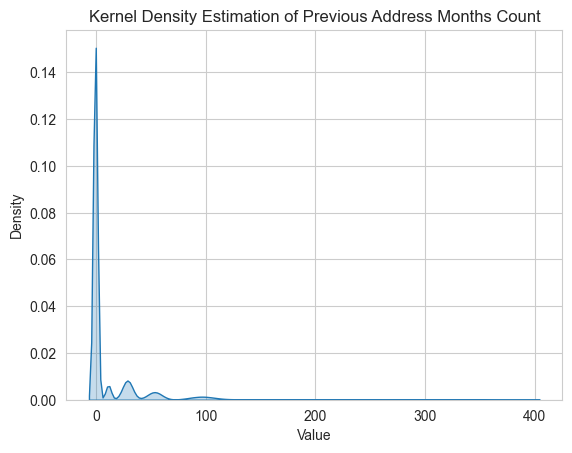

In [18]:
#According to kernel density to undertand data distribution
sns.kdeplot(combined_data['prev_address_months_count'], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Previous Address Months Count')
plt.show()

In [19]:
# List of features to check for invalid values
missing_feature = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes','velocity_6h', 'device_distinct_emails_8w','credit_risk_score']

# Create an empty DataFrame
missing_val = pd.DataFrame()

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_feature:
    combined_data.loc[combined_data[feature] < 0, feature] = np.nan 
    missing_val_col = combined_data.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_val[feature] = missing_val_col

print(missing_val)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               74.17                          0.38   
1                               92.49                          0.10   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.62              24.72   
1                            88.36              37.61   

            session_length_in_minutes  velocity_6h  device_distinct_emails_8w  \
fraud_bool                                                                      
0                                0.21         0.00                       0.03   
1                                0.18         0.01                       0.04   

            credit_risk_score  
fraud_bool                     
0                        1.32  
1                        0.41  


In [20]:
# Reshape the missing_vals DataFrame from wide to long format for better observation
missing_val = pd.DataFrame(missing_val.T.stack())

# Reset the index and rename the columns
missing_val.reset_index(inplace=True)
missing_val.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_val)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         74.17
1      prev_address_months_count           1         92.49
2   current_address_months_count           0          0.38
3   current_address_months_count           1          0.10
4         intended_balcon_amount           0         74.62
5         intended_balcon_amount           1         88.36
6              bank_months_count           0         24.72
7              bank_months_count           1         37.61
8      session_length_in_minutes           0          0.21
9      session_length_in_minutes           1          0.18
10                   velocity_6h           0          0.00
11                   velocity_6h           1          0.01
12     device_distinct_emails_8w           0          0.03
13     device_distinct_emails_8w           1          0.04
14             credit_risk_score           0          1.32
15             credit_risk_score           1          0.

<Figure size 800x600 with 0 Axes>

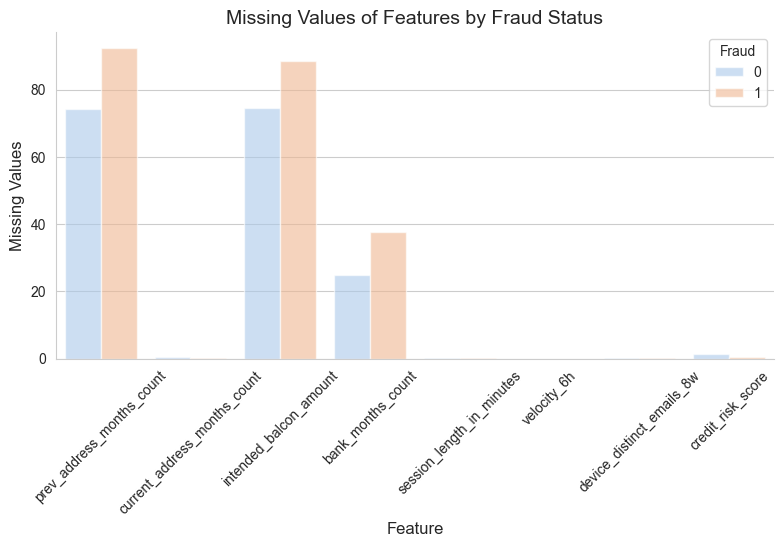

In [21]:
# Set up plot to compare the NaN value under different features
plt.figure(figsize=(8, 6))

# missing_val['feature'] = missing_val['feature'].astype(str)  # Convert to string if not already
missing_val['fraud_bool'] = missing_val['fraud_bool'].astype(str)  # Convert to string if not already

# Create bar plot
sns.catplot(data=missing_val, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

In [22]:
#clean the NaN values under device_distinct_emails_8w and credit_risk_score
feature_names=['device_distinct_emails_8w','credit_risk_score']
combined_data_cleaned=combined_data[combined_data[feature_names].notna().all(axis=1)]

# check NaN values under feature_names
null_counts = combined_data_cleaned[feature_names].isnull().sum()
print(null_counts)

device_distinct_emails_8w    0
credit_risk_score            0
dtype: int64


In [23]:
combined_data_cleaned.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
count,5.919235e+06,5.919235e+06,5.919235e+06,1.526030e+06,5.896840e+06,5.919235e+06,5.919235e+06,1.482705e+06,5.919235e+06,5.918990e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.919235e+06,4.445439e+06,5.919235e+06,5.919235e+06,5.919235e+06,5.908056e+06,5.919235e+06,5.919235e+06,5919235.0,5.919235e+06,1.975090e+06,1.975090e+06
mean,1.112931e-02,5.738401e-01,4.898328e-01,6.309596e+01,9.482171e+01,3.854053e+01,9.444660e-01,3.722755e+01,1.540732e+03,5.571368e+03,4.712204e+03,4.790057e+03,1.946306e+02,8.423774e+00,1.382846e+02,5.227719e-01,4.644234e-01,8.693537e-01,1.499555e+01,2.401694e-01,5.422576e+02,2.454067e-02,7.730595e+00,5.642006e-01,1.021230e+00,0.0,3.488535e+00,1.217292e-02,1.017479e-02
std,1.049069e-01,2.888738e-01,2.907268e-01,6.548289e+01,9.227689e+01,1.365794e+01,5.151248e+00,2.385478e+01,9.840155e+02,2.973925e+03,1.465642e+03,8.977660e+02,4.681246e+02,4.983186e+00,6.843452e+01,4.994812e-01,4.987327e-01,3.370131e-01,1.147781e+01,4.271862e-01,5.021535e+02,1.547205e-01,8.163077e+00,4.958612e-01,1.838786e-01,0.0,2.171794e+00,1.011747e+00,1.010876e+00
min,0.000000e+00,1.000000e-01,5.024707e-08,5.000000e+00,0.000000e+00,1.000000e+01,4.036860e-09,2.738965e-05,1.000000e+00,2.306207e-01,1.297721e+03,2.825748e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.900000e+02,0.000000e+00,4.088612e-05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-4.977864e+00,-4.846414e+00
25%,0.000000e+00,3.000000e-01,2.181764e-01,2.600000e+01,2.400000e+01,3.000000e+01,7.336182e-03,2.065346e+01,8.890000e+02,3.380300e+03,3.543960e+03,4.251343e+03,1.000000e+00,5.000000e+00,8.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,2.000000e+02,0.000000e+00,3.149939e+00,0.000000e+00,1.000000e+00,0.0,2.000000e+00,-6.689876e-01,-6.703189e-01
50%,0.000000e+00,6.000000e-01,4.882276e-01,3.500000e+01,5.900000e+01,4.000000e+01,1.545686e-02,3.281181e+01,1.228000e+03,5.255669e+03,4.691334e+03,4.860497e+03,1.000000e+01,7.000000e+00,1.280000e+02,1.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,0.000000e+00,2.000000e+02,0.000000e+00,5.202857e+00,1.000000e+00,1.000000e+00,0.0,3.000000e+00,6.051123e-03,4.849719e-03
75%,0.000000e+00,8.000000e-01,7.551099e-01,8.400000e+01,1.460000e+02,5.000000e+01,2.664716e-02,4.969219e+01,1.885000e+03,7.517508e+03,5.668952e+03,5.403069e+03,2.900000e+01,1.100000e+01,1.850000e+02,1.000000e+00,1.000000e+00,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+03,0.000000e+00,9.180511e+00,1.000000e+00,1.000000e+00,0.0,5.000000e+00,6.846502e-01,6.824643e-01
max,1.000000e+00,9.000000e-01,1.000000e+00,3.990000e+02,4.290000e+02,9.000000e+01,7.845690e+01,1.131201e+02,6.830000e+03,1.681784e+04,9.585101e+03,7.019201e+03,2.404000e+03,3.900000e+01,3.890000e+02,1.000000e+00,1.000000e+00,1.000000e+00,3.200000e+01,1.000000e+00,2.100000e+03,1.000000e+00,8.723658e+01,1.000000e+00,2.000000e+00,0.0,7.000000e+00,6.434867e+00,6.542492e+00


In [24]:
combined_data_cleaned.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,1,0.9,0.166828,NaN,88.0,50,0.020925,NaN,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185.0,0,BA,1,0,24.0,0,500.0,0,INTERNET,3.888115,windows,0,1.0,0,7,NaN,NaN
1,1,0.9,0.296286,NaN,144.0,50,0.005418,NaN,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259.0,1,BA,0,0,15.0,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,0,7,NaN,NaN
2,1,0.9,0.044985,NaN,132.0,40,3.108549,NaN,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177.0,1,BA,0,1,NaN,0,200.0,0,INTERNET,4.728705,other,0,1.0,0,7,NaN,NaN
3,1,0.9,0.159511,NaN,22.0,50,0.019079,NaN,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110.0,1,BA,0,1,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1.0,0,7,NaN,NaN
4,1,0.9,0.596414,NaN,218.0,50,0.004441,NaN,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295.0,1,BA,1,0,31.0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,0,7,NaN,NaN
5,1,0.3,0.143921,NaN,30.0,30,0.028231,NaN,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199.0,1,BB,0,1,15.0,0,200.0,0,INTERNET,4.815073,windows,0,1.0,0,7,NaN,NaN
6,1,0.7,0.321554,NaN,152.0,30,0.030680,NaN,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272.0,1,BA,1,1,30.0,0,1500.0,0,INTERNET,1.558977,windows,1,1.0,0,7,NaN,NaN
7,1,0.9,0.064817,NaN,18.0,50,0.034557,NaN,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83.0,1,BB,1,0,28.0,0,200.0,1,INTERNET,2.637472,linux,0,1.0,0,7,NaN,NaN
8,1,0.7,0.065938,NaN,64.0,40,0.020691,NaN,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222.0,0,BA,1,1,30.0,0,1500.0,0,INTERNET,2.175419,windows,1,1.0,0,7,NaN,NaN
9,1,0.9,0.700096,NaN,60.0,40,0.016809,NaN,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118.0,1,BC,0,1,25.0,0,200.0,0,INTERNET,24.040726,windows,0,1.0,0,7,NaN,NaN


In [25]:
#需要删掉*******************
nan_df = combined_data_cleaned.isna()

# 使用sum()方法计算每列中NaN值的数量
nan_count = nan_df.sum()

# 使用any()方法检查整个数据集是否存在NaN值
if nan_df.any().any():
    print("There are NaN values in the dataset")
else:
    print("There is no NaN value in the dataset")

# 打印NaN值的数量
print(nan_count)

There are NaN values in the dataset
fraud_bool                                0
income                                    0
name_email_similarity                     0
prev_address_months_count           4393205
current_address_months_count          22395
customer_age                              0
days_since_request                        0
intended_balcon_amount              4436530
payment_type                              0
zip_count_4w                              0
velocity_6h                             245
velocity_24h                              0
velocity_4w                               0
bank_branch_count_8w                      0
date_of_birth_distinct_emails_4w          0
employment_status                         0
credit_risk_score                         0
email_is_free                             0
housing_status                            0
phone_home_valid                          0
phone_mobile_valid                        0
bank_months_count                   1473

In [26]:
# 创建数据框的副本
combined_data_copy = combined_data_cleaned.copy()
 
median_prev_address = combined_data_cleaned['prev_address_months_count'].median()
median_current_address=combined_data_cleaned['current_address_months_count'].median()
median_intended_balcon_amount=combined_data_cleaned['intended_balcon_amount'].median()
median_bank_months_count=combined_data_cleaned['bank_months_count'].median()
median_session_length=combined_data_cleaned['session_length_in_minutes'].median()
median_velocity_6h=combined_data_cleaned['velocity_6h'].median()
 
# 使用 .loc 同时选择行和列来赋值
combined_data_copy.loc[:, 'prev_address_months_count'] = combined_data_cleaned['prev_address_months_count'].fillna(median_prev_address)
combined_data_copy.loc[:, 'current_address_months_count'] = combined_data_cleaned['current_address_months_count'].fillna(median_intended_balcon_amount)
combined_data_copy.loc[:, 'intended_balcon_amount'] = combined_data_cleaned['intended_balcon_amount'].fillna(median_current_address)
combined_data_copy.loc[:, 'bank_months_count'] = combined_data_cleaned['bank_months_count'].fillna(median_bank_months_count)
combined_data_copy.loc[:, 'session_length_in_minutes'] = combined_data_cleaned['session_length_in_minutes'].fillna(median_session_length)
combined_data_copy.loc[:, 'velocity_6h'] = combined_data_cleaned['velocity_6h'].fillna(median_velocity_6h)
 
if combined_data_copy['current_address_months_count'].isnull().any():
    print("存在空值。")
else:
    print("median_prev_address: ",median_prev_address)
    print("current_address_months_count: ",median_current_address)
    print("intended_balcon_amount: ",median_intended_balcon_amount)
    print("bank_months_count: ",median_bank_months_count)
    print("session_length_in_minutes: ",median_session_length)
    print("velocity_6h: ",median_velocity_6h)

median_prev_address:  35.0
current_address_months_count:  59.0
intended_balcon_amount:  32.81180821833976
bank_months_count:  15.0
session_length_in_minutes:  5.202857025633657
velocity_6h:  5255.6692872552285


In [27]:
combined_data_copy = combined_data_copy.drop(['x1', 'x2'], axis=1)

In [28]:
combined_data_copy.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,35.0,88.0,50,0.020925,59.0,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185.0,0,BA,1,0,24.0,0,500.0,0,INTERNET,3.888115,windows,0,1.0,0,7
1,1,0.9,0.296286,35.0,144.0,50,0.005418,59.0,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259.0,1,BA,0,0,15.0,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,0,7
2,1,0.9,0.044985,35.0,132.0,40,3.108549,59.0,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177.0,1,BA,0,1,15.0,0,200.0,0,INTERNET,4.728705,other,0,1.0,0,7
3,1,0.9,0.159511,35.0,22.0,50,0.019079,59.0,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110.0,1,BA,0,1,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1.0,0,7
4,1,0.9,0.596414,35.0,218.0,50,0.004441,59.0,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295.0,1,BA,1,0,31.0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,0,7
5,1,0.3,0.143921,35.0,30.0,30,0.028231,59.0,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199.0,1,BB,0,1,15.0,0,200.0,0,INTERNET,4.815073,windows,0,1.0,0,7
6,1,0.7,0.321554,35.0,152.0,30,0.030680,59.0,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272.0,1,BA,1,1,30.0,0,1500.0,0,INTERNET,1.558977,windows,1,1.0,0,7
7,1,0.9,0.064817,35.0,18.0,50,0.034557,59.0,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83.0,1,BB,1,0,28.0,0,200.0,1,INTERNET,2.637472,linux,0,1.0,0,7
8,1,0.7,0.065938,35.0,64.0,40,0.020691,59.0,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222.0,0,BA,1,1,30.0,0,1500.0,0,INTERNET,2.175419,windows,1,1.0,0,7
9,1,0.9,0.700096,35.0,60.0,40,0.016809,59.0,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118.0,1,BC,0,1,25.0,0,200.0,0,INTERNET,24.040726,windows,0,1.0,0,7


In [29]:
print(combined_data_copy.columns)

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')


In [30]:
#需要删掉*******************
nan_df = combined_data_copy.isna()

# 使用sum()方法计算每列中NaN值的数量
nan_count = nan_df.sum()

# 使用any()方法检查整个数据集是否存在NaN值
if nan_df.any().any():
    print("There are NaN values in the data set")
else:
    print("There is no NaN value in the dataset")

# 打印NaN值的数量
print(nan_count)

There is no NaN value in the dataset
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source       

In the above process of dealing with missing and invalid values, we first went through the kernel density plot to get an idea of the distribution of values for some features, and then we checked for null values in the dataset, which showed that there were no null values. In the next step, we defined some features and replaced all the invalid values less than 0 under these features with NaN values. And for smaller number of null values under the features, we chose to delete them directly. And for larger number of null values under the features, we chose to fill them with mean values.

### 3.2.2 Distribution and Outliers of Features

Processing outliers is also an important step in data preprocessing, and it is beneficial in the following ways:
<ol>
    <li>Outliers may negatively affect the training and performance of the model. Dealing with outliers can help improve the accuracy of the model.</li>
    <li>Improve data visualization. In visualization, outliers may cause stretching or shifting of the graph, affecting the overall data presentation.
    <li>Improve the interpretability of data. In some cases, outliers can be the result of misinformation or unusual behavior that can cause misinterpretation of model predictions.</li>
</ol>

In [31]:
# Create a list of numeric features in the DataFrame 
#The numeric_features list includes lists who have unique values larger than 10
numeric_features = [x for x in combined_data_copy.columns if combined_data_cleaned[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


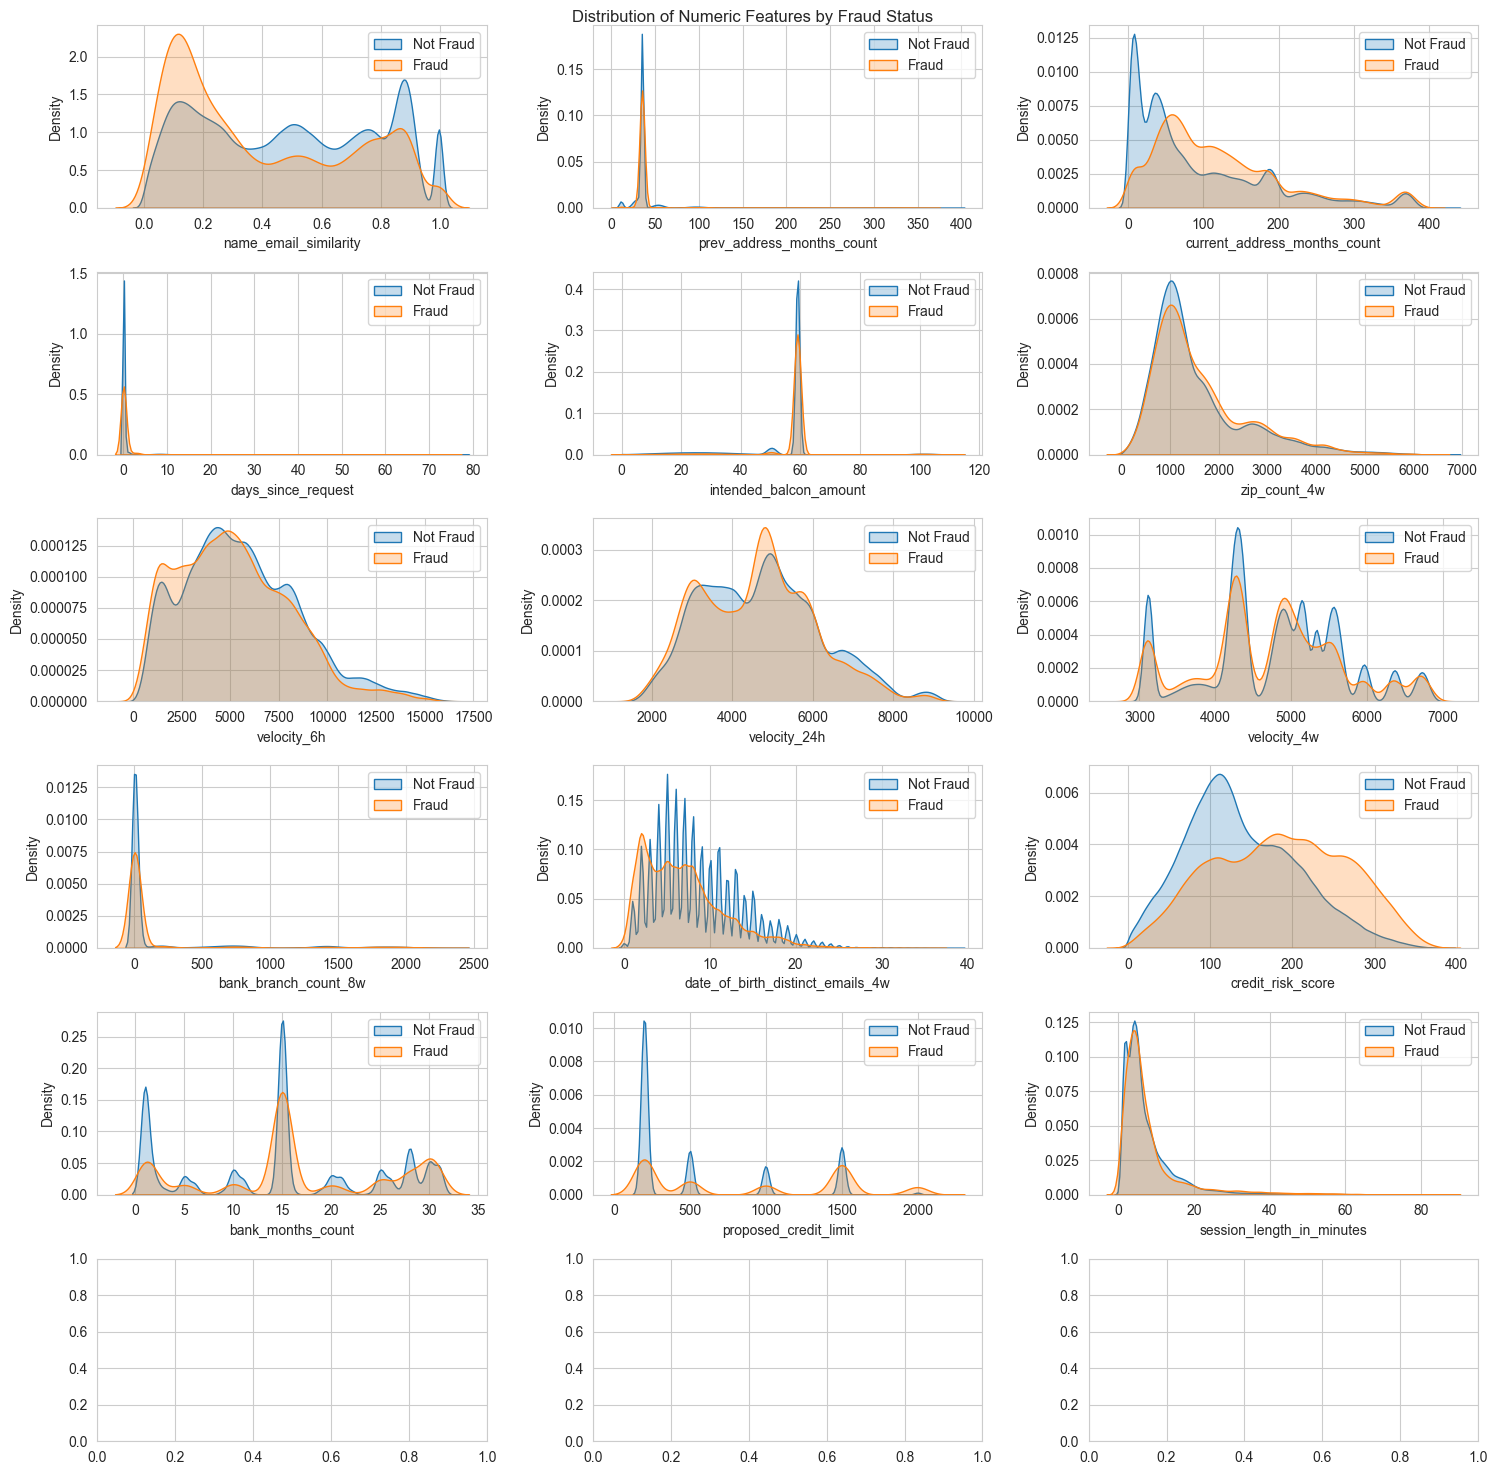

In [32]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=combined_data_copy[combined_data_cleaned['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=combined_data_copy[combined_data_cleaned['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

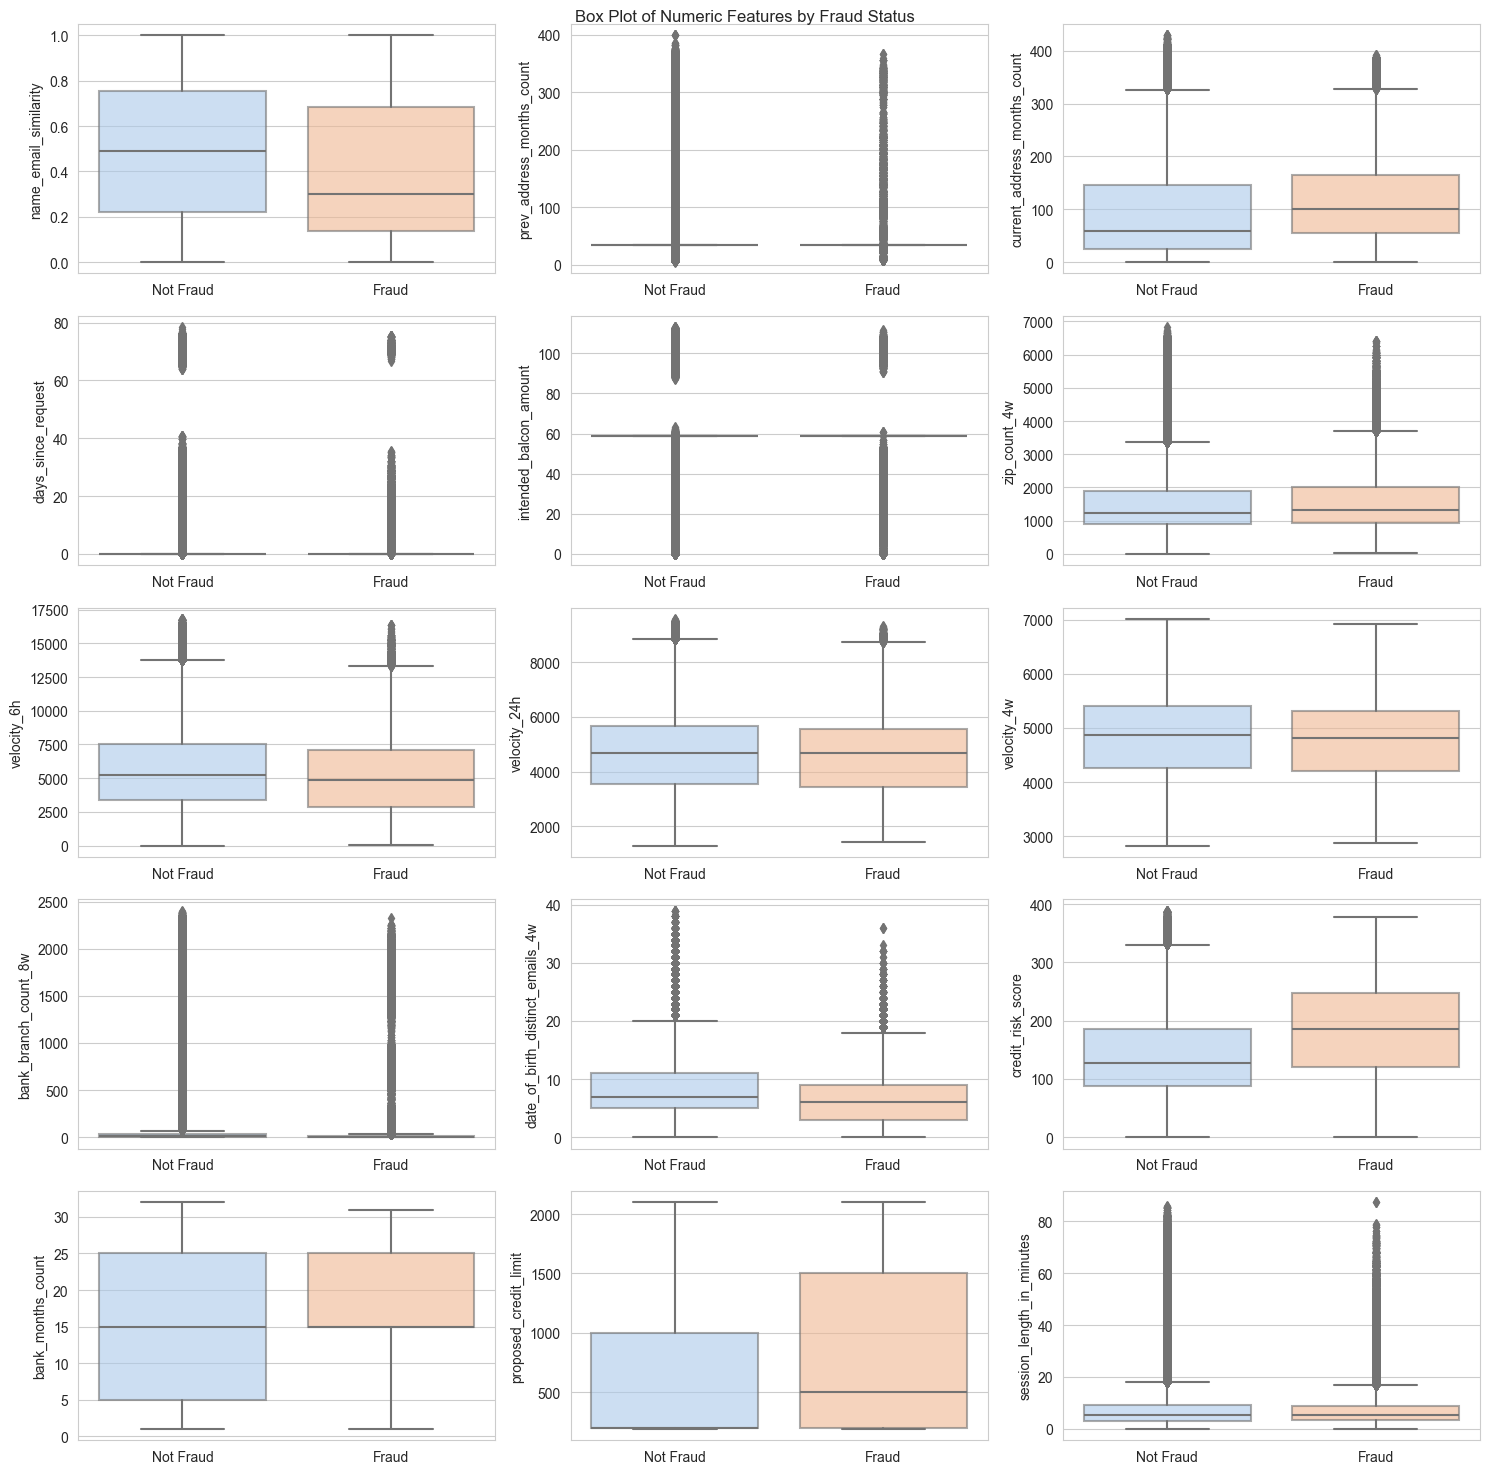

In [33]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=combined_data_copy, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In the above operations, we visualize the data through kernel density estimation plots and box-and-line plots to understand the distribution of different features in the fraud and non-fraud categories. Our observations reveal that the distribution of data in the dataset is rather unbalanced, and in this case removal of outliers may bring about adjustments. The outliers often contain some valuable information or instances representing minority groups as well. And in this case, on the one hand, due to the incomplete interpretation of features in the dataset, we cannot tell whether these outliers are real cases or input errors, and on the other hand, we believe that removing them may lead to data loss and introduce bias against the majority class. Therefore, in the above operation, we keep these outliers and hope to explore the meaning behind these data in the next model learning.

<a id="33"></a>

## 3.3. Feature Engineering for Fraud Detection of Bank Account Applications

### 3.3.1 One-Hot Encoding for Categorical Features

One-Hot Encoding converts every possible value of each categorical variable to a new binary feature column so that every possible categorical value becomes a new feature column containing 0 or 1, indicating whether the categorical value was present in the original data. Because most machine learning algorithms require the input feature to be numerical and the original classification feature is usually a string or discrete label, it needs to be transformed so that the algorithm can understand and process it to avoid misunderstanding of numerical associations: If the classification features are represented directly by integer values, the model may mistakenly treat the relationship between these integer values as having some degree of order or size relationship. One-Hot Encoding ensures that each classification value is independent of each other, improving model performance.

###### In this part, a feature engineering called One-Hot Encoding is carried out, which is mainly applied to processing the classification features of the data set. Firstly, by filtering the columns whose data type is object in the dataset, the columns with classification information are identified. These columns include `payment_type`, `employment_status`, `housing_status`, `source`, `employment_status`, and `employment_status`. `device_os` 

In [34]:
# Create a list of categorical features in the DataFrame combined_data_copy whose data type is `object`
categorical_features = [x for x in combined_data_copy.columns if combined_data_copy[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


###### Create a new DataFrame: pd.DataFrame(...) Part is used to convert the result of One-Hot Encoding to a new data box, combined_data_copy. The new data box contains all the numeric variables in  the original data, as well as the dummy variables processed by One-Hot Encoding.

In [35]:
# Convert categorical variables into dummy variables using one-hot encoding
combined_data_copy = pd.DataFrame(pd.get_dummies(combined_data_copy, prefix=categorical_features))

###### Display the first 5 rows of the data box: combined_data_copy.head() is used to display the first 5 rows of the new data box so that the converted data can be viewed.

In [36]:
# Display the first 5 rows of the DataFrame
combined_data_copy.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,35.0,88.0,50,0.020925,59.0,769,10650.765523,3134.319630,3863.647740,1,6,185.0,0,1,0,24.0,0,500.0,0,3.888115,0,1.0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,35.0,144.0,50,0.005418,59.0,366,534.047319,2670.918292,3124.298166,718,3,259.0,1,0,0,15.0,0,1500.0,0,31.798819,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,35.0,132.0,40,3.108549,59.0,870,4048.534263,2893.621498,3159.590679,1,14,177.0,1,0,1,15.0,0,200.0,0,4.728705,0,1.0,0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,35.0,22.0,50,0.019079,59.0,810,3457.064063,4054.908412,3022.261812,1921,6,110.0,1,0,1,31.0,1,200.0,0,2.047904,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,35.0,218.0,50,0.004441,59.0,890,5020.341679,2728.237159,3087.670952,1990,2,295.0,1,1,0,31.0,0,1500.0,0,3.775225,1,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


###### The purpose of this code is to separate the feature matrix X and the target variable y from the data set combined_data_copy:

###### X: Contains all feature columns except the target variable `fraud_bool`. This is the feature matrix used to train machine learning models.

###### y: is the target variable and contains the `fraud_bool` column, which indicates whether each sample is in the fraud category. This is what the model is trying to predict.

###### The purpose of separating the feature matrix from the target variable is to be able to correctly feed the data to the machine learning algorithm for training. Typically, X contains the features of the input model, while y contains the corresponding target label.

In [37]:
# Separate the feature matrix and target variable
X = combined_data_copy.drop(['fraud_bool'], axis=1) 
y = combined_data_copy['fraud_bool']

### 3.3.2 Min-Max Scaling for Numerical Features

Numerical range consistency: Min-Max Scaling scales numerical features to a uniform range, usually [0, 1]. This helps to ensure that the range of values between different features does not affect the training effectiveness of the machine learning model.

Avoid models affected by feature scale: Some machine learning models are very sensitive to the scale of features. Minimum-maximum scaling prevents the model from being affected by a range of feature values, ensuring that the model treats each feature equally.

Improved model convergence speed: Scaled features can speed up the convergence process of some machine learning algorithms, allowing them to reach the optimal solution faster.

###### Import the necessary libraries: The code uses ColumnTransformer and MinMaxScaler, which are used for column transformation and min-max scaling data preprocessing, respectively.

In [38]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

###### Create MinMaxScaler: numeric_transformer = MinMaxScaler() creates a MinMaxScaler object that will be used for min-max scaling of numeric features.

###### Define ColumnTransformer: preprocessor is a ColumnTransformer object that will be applied to column transformations of data. In this case, it is defined to apply numeric_transformer to numeric features and do nothing to other types of features (set to `'passthrough'` via the `'remainder'` parameter).

###### Fit and transform data: X_scaled = preprocessor.fit_transform(X) Using the fit_transform method, fit the preprocessor object to the eigenmatrix X and transform X. This causes numerical features to be min-max scaled.

In [39]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

###### The preprocessor.get_feature_names_out() command is used to obtain the preprocessed feature names.
###### Processing feature names: By iterating all feature names, replacing `remainder__` with an empty string, we can obtain the final list of pre-processed feature names.

###### Output feature name: Print out the final pre-processed list of feature names.

In [40]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

###### Converts the min-max scaled training set X_scaled from the NumPy array to the Pandas data frame. This conversion is mainly to take advantage of the more powerful data processing and analysis capabilities provided by Pandas.

In [41]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

<a id="34"></a>

## 3.4. Feature Selection for Fraud Detection of Bank Account Applications

In fraud detection, due to the relatively small number of fraud cases, the model may be too biased to predict the negative category, resulting in the underreporting of fraud cases. By undersampling, the sample distribution of positive and negative categories can be balanced, making it easier for the model to catch fraud cases.

The problem of unbalanced class is solved by undersampling the data with NearMiss algorithm. This reduces the number of instances in most categories, makes the data more balanced, and allows for a more impartial assessment of the feature selection process. Reduce the number of instances of most categories to ensure that the model has a fair assessment of both categories.

Enhanced feature selection: Feature selection is performed on a balanced dataset to ensure that the selected features are representative of both fraud and non-fraud cases.

In [42]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

#### 3.4.1 Resampling for Effective Feature Selection Tests

In [43]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

###### Undersample X_scaled and y using NearMiss. sampling_strategy=1 indicates that the number of samples in the negative category is expected to reach the level of the number of samples in the positive category. n_jobs=-1 indicates that all available CPU cores are used.
###### Output information:
###### Initial sample statistics: Outputs the number of samples for each category of the original unbalanced test set.
###### Sample statistics after undersampling: The number of samples after undersampling by NearMiss is output.
###### Execution time: Outputs the execution time of the entire operation.

In [44]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Test dataset samples per class Counter({0: 5853358, 1: 65877})
Resampled dataset shape Counter({0: 65877, 1: 65877})
CPU times: total: 23min 30s
Wall time: 6min 22s


###### Using list comprehensions, we determine which features are classified features by traversing all columns of X_scaled_nm and determining whether the number of unique values in each column is between 2 and 10.
###### Output: Outputs the names of all columns that are recognized as classification features.

In [45]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


###### Using the same list deduction, we iterate over all columns of X_scaled_nm to determine whether the number of unique values in each column is greater than or equal to 10, thus determining which features are numerical features.
###### Output: Outputs the names of all columns identified as numerical features.

In [46]:
# Create a list of numerical features in the DataFrame X_scaled_nm
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


### 3.4.2 Variance Threshold Test for Constant Features

Imlementation:
Use VarianceThreshold to remove features with zero variance that have the same value in all instances.

Significance:
Reduce redundancy: Delete features with zero variance, reduce redundant information, and improve analysis quality.

When we train a machine learning model, the values of some features are the same throughout the data set, that is, the features do not change and are considered "constant features". These constant features do not provide useful information for the training process of the model and may introduce noise. Therefore, we usually identify and remove these constant features before training the model.

By comparing the original feature with the Boolean mask, the name of the feature that is judged to be constant is found and printed.

In [47]:
# Instantiate a VarianceThreshold selector and fit it to the NearMiss-resampled training set
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns 
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


###### Features with no variance have been dropped from the dataset to improve the quality of the analysis. These features provide no useful information as they exhibit the same value across all instances. By removing them, we eliminate redundancy and reduce noise, enabling a more focused and accurate exploration of the remaining features.

In [48]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

### 3.4.3 Pearson Correlation Test for Multicollinearity

###  Pearson Correlation Test for Multicollinearity
###### To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding 0.7, indicating a lack of strong linear dependencies.

###### The purpose of this code is to check the linear correlation between features by drawing a heat map of the correlation coefficient matrix in order to identify the case of Multicollinearity. Multicollinearity means that there is a high degree of correlation between features, which can cause instability in the model, making the model very sensitive to changes in input features.

c:\Users\60956\.conda\envs\pycaret\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


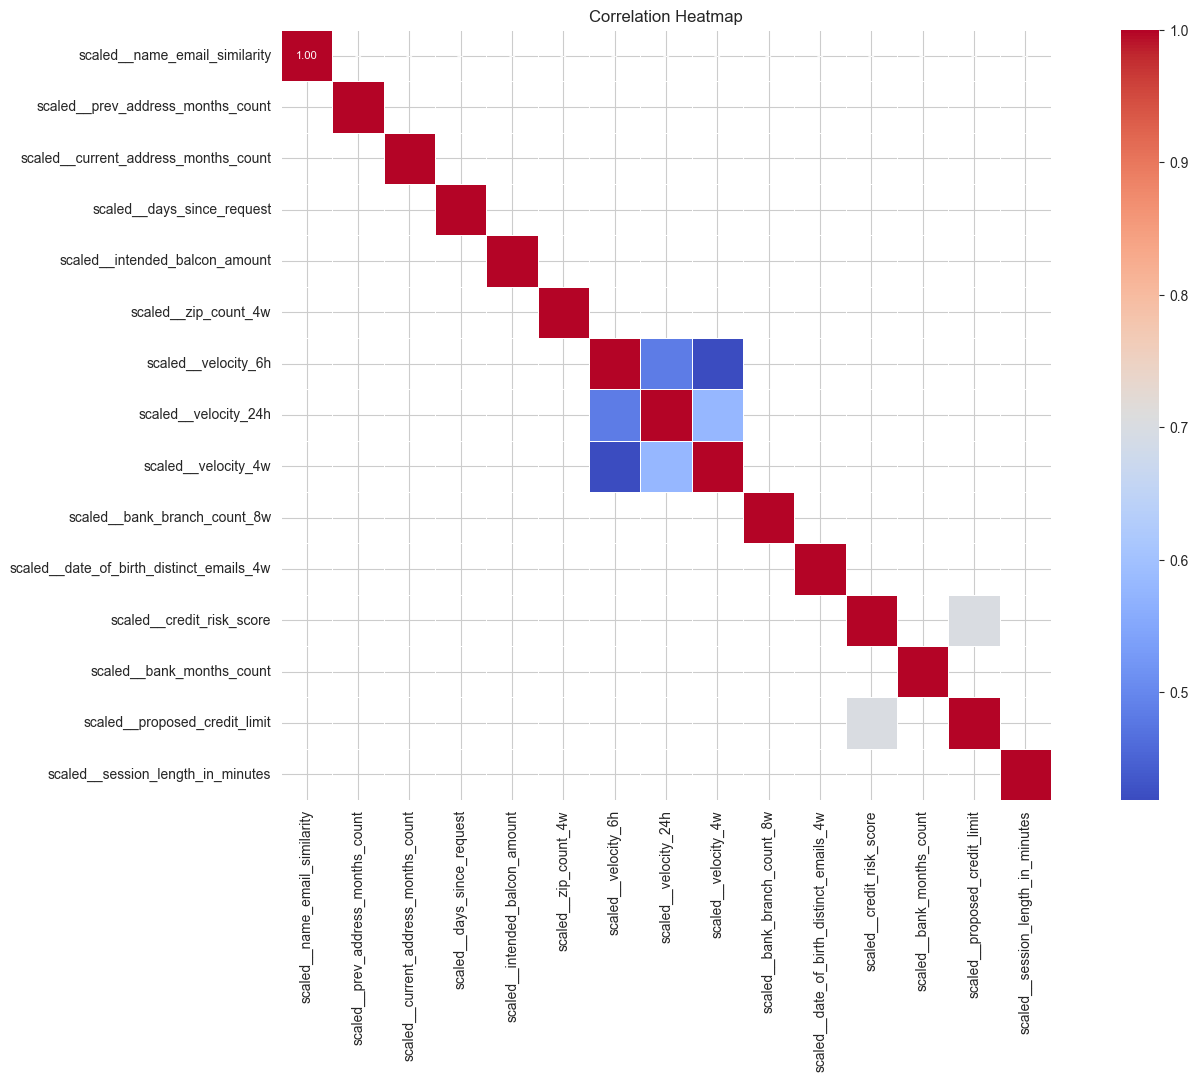

In [49]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

### 3.4.4 Chi-Squared Test for Categorical Features

The Chi-Square Test is a statistical method used to assess the association between two categorical variables. It determines whether two variables are independent by comparing the difference between the observed data distribution and the expected theoretical distribution.

###### This line of code is used to see the distribution of different values in a column named device_distinct_emails_8w. The device_distinct_emails_8w column contains 3 distinct values (1.0, 2.0, 0.0) and shows how many times each value appears. Such information helps to understand the characteristic distribution of the data and the possible outliers.

In [50]:
# Check the distribution of values in a column
X_scaled_nm.device_distinct_emails_8w.value_counts()

1.0    124388
2.0      6378
0.0       988
Name: device_distinct_emails_8w, dtype: int64

###### The purpose of this code is to remove the problematic data. Specifically, we first found which rows of data were problematic (in the column X_scaled_nm[`device_distinct_emails_8w`] with a value less than 0), These rows are then removed from both the eigenmatrix X_train_cat and the target variable y_train_cat.

In [51]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

###### This line of code uses the chi-squared test to evaluate the relationship between the classification feature X_train_cat and the target variable y_train_cat. The purpose of Chi-square test is to check whether there is a correlation between two categorical variables, or whether they are independent of each other.

###### In this context, X_train_cat contains a set of classification features, and y_train_cat is the target variable. The results of the chi-square test are stored in chi2_results, which includes the chi-square value and corresponding p-value between each classification feature and the target variable.

In [52]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

###### This code creates a pandas DataFrame to store the results of a card square check

In [53]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

###### This code is used to draw a bar chart of the relationship between chi-square values and classification features. The purpose of this graph is to visually show the degree of influence of each classification feature on the target variable, where the X-axis represents the different classification features and the Y-axis represents the chi-square value.

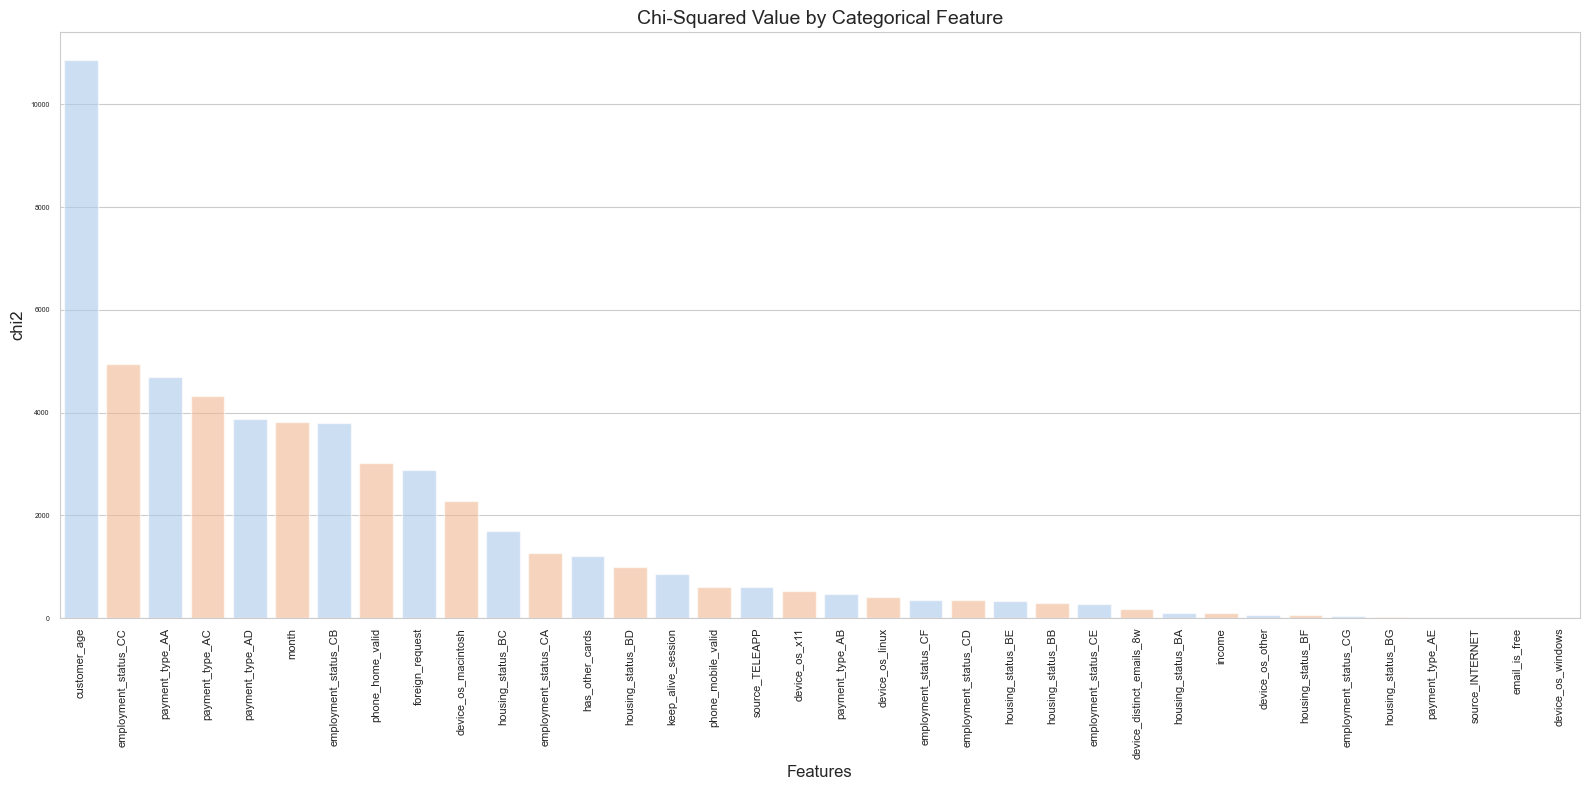

In [54]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between categorical features and the target variable, a chi-squared test was conducted. This statistical analysis allowed us to evaluate the relationship between the categorical variables and the target feature. The results of the chi-squared test unveiled an intriguing insight: among the examined categorical features, `customer_age` stood out as the most influential predictor of the target variable.

###### The SelectKBest method combined with Chi-square test was used to select the top 15 features with the strongest correlation with the target variable from all the classification features.

In [55]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'month', 'payment_type_AA',
       'payment_type_AC', 'payment_type_AD', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'housing_status_BC',
       'housing_status_BD', 'device_os_macintosh'],
      dtype='object')]


### 3.4.5 Mutual Information Test for Numeric Features

Mutual information tests are used to evaluate the relationship between numerical characteristics and target variables.

Implementation:
Use the mutual information test to evaluate the relationship between numerical features and target variables.

Significance:
Nonlinear relationships: Evaluate nonlinear relationships and identify information associations between numerical features and target variables.

In [56]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [57]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

###### Create a DataFrame that contains mutual information test results

In [58]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

###### Visualize the results of mutual information tests to help select numerical features.

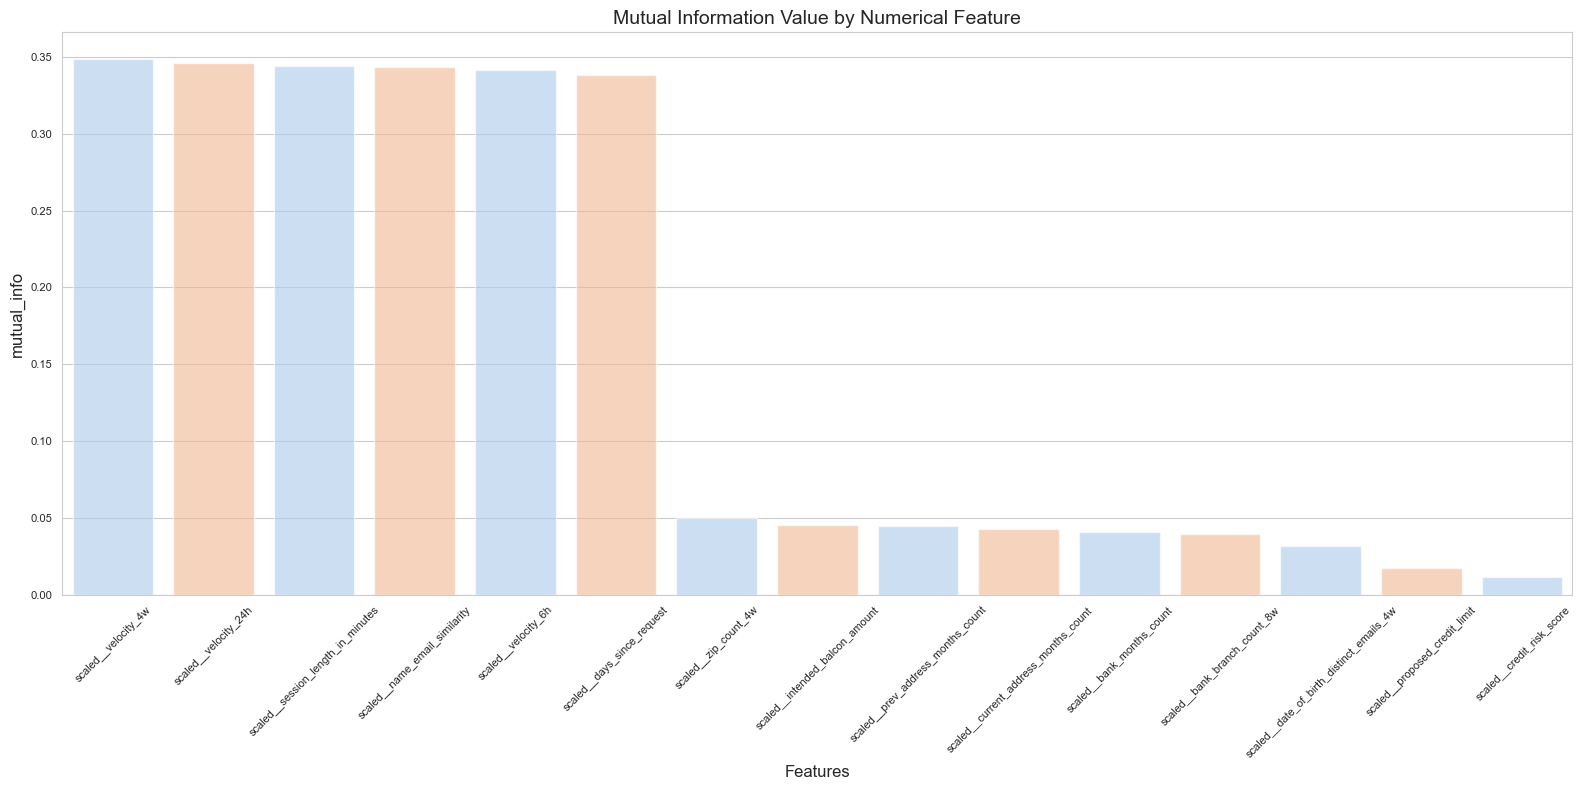

In [59]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between numeric features and the target variable, a mutual information test was conducted. This statistical analysis allowed us to evaluate the relationship between the numeric variables and the target feature. The results of the mutual information test unveiled an intriguing insight: among the examined numeric features, `scaled__name_email_similarity`, `scaled__prev_address_months_count`, `scaled__current_address_months_count`, `scaled__days_since_request`, `scaled__intended_balcon_amount` and `scaled__zip_count_4w` stood out as the most influential predictor of the target variable.

###### The SelectKBest method combined with mutual information tests is used to select the top 15 features that are most strongly related to the target variable from all the numerical features.

In [60]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


### 3.4.6 Extra Trees Classifier for Feature Selection
Implementation:
Use Extra Trees classifier for feature selection and evaluate feature importance.

Significance:
Nonlinear and combinatorial properties: Capture the effects of nonlinearity and feature combinations through tree models to identify features that have an important impact on the target variable.
Model complexity: Extra Trees provide a global view of very large feature spaces at low computational cost.

###### Use the Extra Trees model to assess the importance of the features, and then select the features that have a greater impact on the target variable. This is a method of feature selection to improve the effectiveness of the model and reduce the computational cost.使用 Extra Trees 

In [61]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)

['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_mobile_valid', 'device_distinct_emails_8w', 'month', 'payment_type_AC', 'employment_status_CA']


###### Build a DataFrame that contains the importance scores for each feature and the scores provided by the Extra Trees classifier.

In [62]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

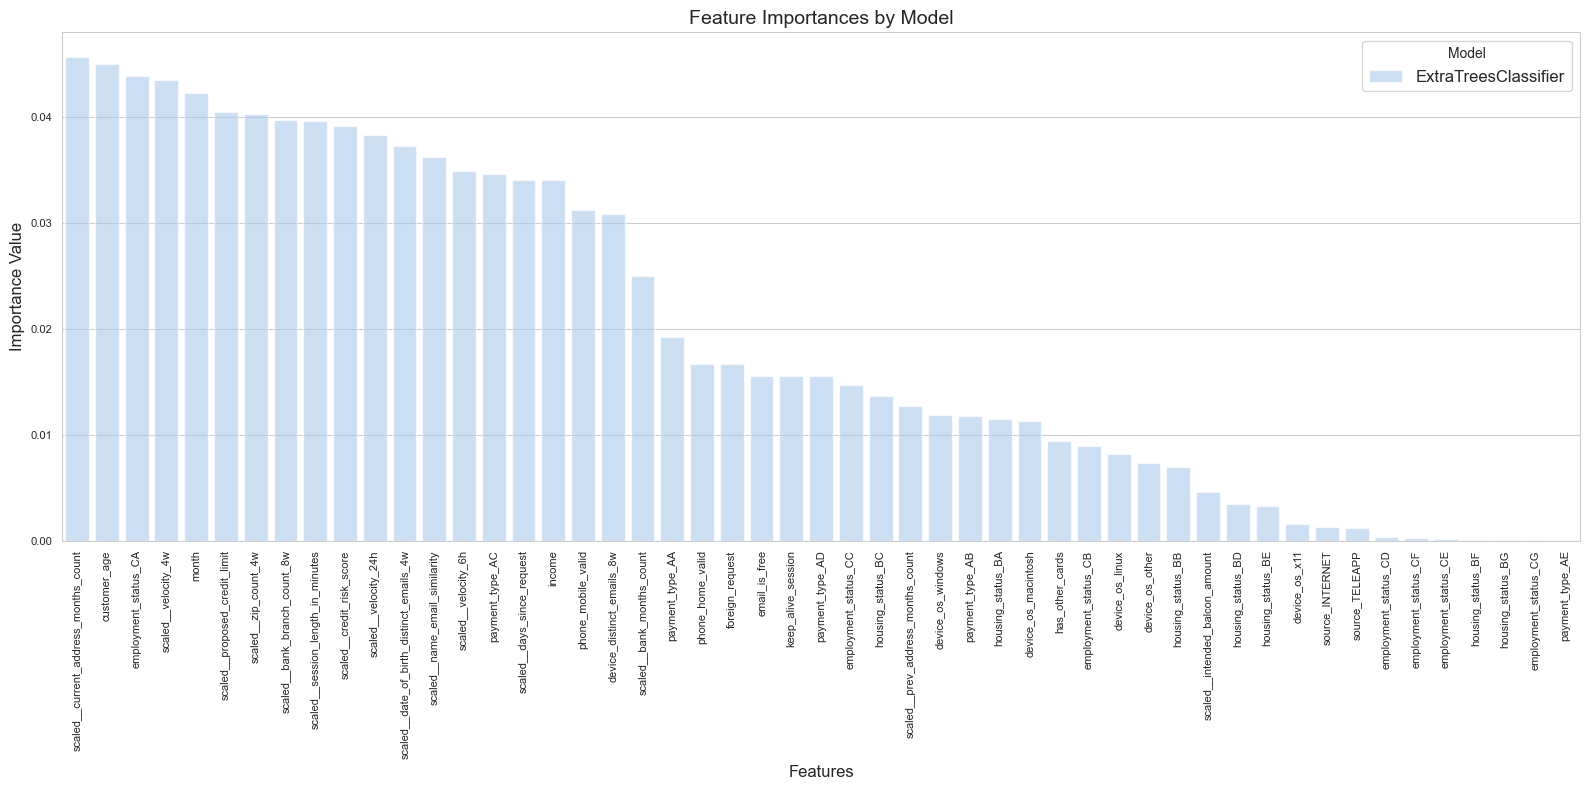

In [63]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The decision to employ the ExtraTreesClassifier for feature selection was motivated by its robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, `name_email_similarity`, `current_address_months_count`,
       `days_since_request`, `zip_count_4w`, `velocity_6h`, `velocity_24h`,
       `velocity_4w`, `bank_branch_count_8w`,
       `date_of_birth_distinct_emails_4w`, `credit_risk_score`,
       `bank_months_count`, `proposed_credit_limit`,
       `session_length_in_minutes`, `income`, `customer_age`,
       `phone_mobile_valid`, `device_distinct_emails_8w`, `month`,
       `payment_type_AC` and `employment_status_CA` emerged as the top features.

<a id="35"></a>

## 3.5. Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications

Tree models (e.g., CatBoost, LightGBM, XGBoost, etc.) have some advantages over models such as linear regression and convolutional neural networks (CNNs) in fraud detection tasks, especially when dealing with nonlinear and unbalanced data:

<ol>
    <li>Non-linear modelling capability: Tree models have an inherent ability to model non-linearities and capture complex non-linear relationships in data. This is important for fraud detection tasks because fraudulent behaviour often exhibits complex patterns that are difficult to capture with linear models.
    </li>
    <li>Handling unbalanced data: Fraud detection is often a category imbalance problem, where the number of fraudulent transactions is much smaller than the number of normal transactions. Tree models can better handle imbalanced data because they can weight samples from different categories differently or generate synthetic samples to balance the category distribution through oversampling techniques.</li>
    <li>Feature Selection and Importance Ranking: Tree models can provide an importance ranking of features to help identify which features are most important for fraud detection. This helps to reduce dimensionality, reduce the impact of noisy features, and improve the interpretability of the model.</li>
    <li>Interpretability: Tree models are often easier to interpret than some complex deep learning models. This is important for fraud detection tasks, as it is necessary to be able to understand and explain the model's decisions.</li>
    <li>Fast training and inference: Tree models are typically fast to train and fast to infer, which is important for handling large-scale datasets and real-time fraud detection.</li>
</ol>

It is important to note that tree models are not the best choice in all cases, but are determined by the nature of the specific problem and data. In some cases, deep learning models or linear models may perform better. 

<a id="351"></a>

### 3.5.1 Fraud Detection Model Training Functions using Oversampling and Search CV

In [64]:
# Importing the pickle library to save and load machine learning models
import pickle

import os
# if there is not models folder, create one
if not os.path.exists('models'):
    os.makedirs('models')

# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

<b>Oversampling</b>

Oversampling is a technique used in machine learning to address class imbalance, particularly in tasks like fraud detection. Class imbalance occurs when one class (e.g., the positive class representing fraudulent transactions) is significantly underrepresented compared to another class (e.g., the negative class representing legitimate transactions). In such cases, the model may become biased towards the majority class, leading to poor performance in identifying the minority class (fraudulent transactions).

Oversampling involves creating additional instances of the minority class to balance the class distribution. This can be done by duplicating existing samples or generating synthetic data points. By increasing the number of minority class samples, the machine learning model has more data to learn from, which can help improve its ability to detect rare events, such as fraud.

In our training function, our training function include 3 options for oversampling, including <b>SMOTE</b> (Synthetic Minority Over-sampling Technique), <b>SMOTENC</b> (SMOTE for Nominal and Continuous features), and <b>ADASYN</b>（Adaptive Synthetic Sampling. All oversampling methods for dealing with category imbalance problems, especially in data imbalance tasks such as fraud detection. They each have advantages and disadvantages depending on the characteristics of the dataset and the task. The following is short introduction of the three oversampling methods.

<ol>
    <li>SMOTE (Synthetic Minority Over-sampling Technique): <br><br>
    <i>How it works</i>: SMOTE works by generating synthetic samples for the minority class. It selects a minority class sample and one or more of its k-nearest neighbors, and then creates new synthetic samples along the line segments connecting the selected sample and its neighbors in the feature space.<br>
    </li>
    <br>
    <li>ADASYN (Adaptive Synthetic Sampling):<br><br>
    <i>How it works</i>: ADASYN is an adaptive technique that generates synthetic samples based on the density of minority class samples. It focuses on the regions of the feature space where the density of minority class samples is lower and generates more synthetic samples in those regions.</li>
    <br>
    <li>SMOTENC (SMOTE for Nominal and Continuous features):<br><br>
     <i>How it works</i>: SMOTENC is an extension of SMOTE designed to handle datasets with both categorical and continuous features. It generates synthetic samples by considering the majority class and selecting neighboring samples based on a combination of continuous and categorical attributes.</li>
</ol>

In data imbalance tasks such as fraud detection, which oversampling method to choose usually depends on the characteristics of the data set and the task requirements. Although these methods have their own advantages and disadvantages, in practical applications, experimentation and evaluation are often recommended to determine which method is best for solving a specific problem. In our following work <a>3.5.4</a>, we conduct an experiment to compare the performance with different oversampler.
<br>

<b>Hyperparameter Tuning (or Search) with Cross-Validation (CV) </b>

Hyperparameter tuning, also known as hyperparameter search or grid search, is the process of systematically selecting the best hyperparameters for a machine learning model to optimize its performance. Hyperparameters are configuration settings for a model that are not learned from the data but are set prior to training. Common hyperparameters include learning rates, the number of hidden layers in a neural network, the maximum depth of a decision tree, and regularization strength.

Hyperparameter tuning typically involves a search over a predefined range or space of hyperparameters to find the combination that yields the best model performance. To evaluate the performance of different hyperparameter combinations, cross-validation (CV) is often used. Cross-validation involves splitting the dataset into multiple subsets (folds), training the model on some folds, and evaluating it on others. This process is repeated multiple times with different fold combinations to obtain a robust estimate of the model's performance. Our traing function rpovides the two followeing two search CV methods: 

<ul>
    <li><b>Randomized Search</b>: It is an alternative to grid search that addresses the computational cost of evaluating all possible hyperparameter combinations. Instead of evaluating all combinations, randomized search randomly samples a specified number of hyperparameter combinations from the hyperparameter space. This sampling process can be performed with or without replacement. By sampling a subset of combinations, randomized search can be more efficient than grid search while still providing a good chance of finding optimal hyperparameters. </li>
    <li><b>Grid Serch</b>: It is a specific hyperparameter tuning technique where a predefined set of hyperparameters and their possible values are specified in advance. The hyperparameter space forms a grid, and grid search systematically evaluates all possible combinations of hyperparameters. For each combination, cross-validation is used to measure the model's performance. Grid search is an exhaustive search method that can be computationally expensive, especially when the hyperparameter space is large.</li>
<ul>

In [65]:
# Import the necessary libraries for training the model
from sklearn.model_selection import StratifiedKFold, KFold # Import the necessary libraries for cross-validation
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, KMeansSMOTE # Import the necessary libraries for oversampling imbalanced datasets
from imblearn.pipeline import make_pipeline # Import the necessary libraries for creating pipelines
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # Import necessary modules for hyperparameter tuning

# Training the model
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features=None, 
                     oversampling_method='SMOTE', cv_method='stratified', search_type='random'):
    """
    Train a classifier using the specified parameters and return the trained model.
    
    Parameters:
    classifier (sklearn estimator): The estimator to train.
    param_dist (dict): The distribution of parameters to search over.
    X_train (pandas DataFrame): The training features.
    y_train (pandas Series): The training target.
    encoded_features (list, optional): A list of encoded categorical features for SMOTENC.
    oversampling_method (str, optional): The oversampling method to use. Can be 'SMOTE', 'ADASYN', or 'SMOTENC'. Defaults to 'SMOTE'.
    cv_method (str, optional): The cross-validation method to use. Can be 'stratified' or 'standard'. Defaults to 'stratified'.
    search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.
    
    Returns:
    A trained classifier.
    """

    # Select the oversampling method
    if oversampling_method == 'SMOTE':
        oversampler = SMOTE(sampling_strategy='minority', random_state=42)
    elif oversampling_method == 'ADASYN':
        oversampler = ADASYN(sampling_strategy='minority', random_state=42)
    elif oversampling_method == 'SMOTENC' and encoded_features is not None:
        oversampler = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
    elif oversampling_method == 'SMOTENC' and encoded_features is None:
        raise ValueError('encoded_features must be provided if SMOTENC is used.')
    else:
        raise ValueError('Invalid oversampling method or required parameters not provided.')

    # Create pipeline with the selected oversampler and the classifier
    pipeline = make_pipeline(oversampler, classifier)
    
    # Select the cross-validation strategy
    if cv_method == 'stratified':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    elif cv_method == 'standard':
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
    else:
        raise ValueError('cv_method must be either "stratified" or "standard"')
    
    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                       param_distributions=param_dist,
                                       n_iter=20,
                                       scoring="roc_auc",
                                       n_jobs=-1,
                                       cv=cv,
                                       return_train_score=True)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv,
                                 return_train_score=True)
    else:
        raise ValueError('search_type must be either "random" or "grid"')
        
    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv

###### <i>Ploting Learnint Curve (not function properly)

In [66]:
# Ploting Learnint Curve (not function properly)
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<a id="352"></a>

### 3.5.2 Fraud Detection Model Testing Functions

Accuracy alone may not be a reliable metric for evaluating bank account fraud models, especially when dealing with imbalanced datasets. Instead, precision, recall, and F1 score are better options. Among these metrics, recall at a 5% FPR is ideal for minimising false negatives and reducing the risk of flagging legitimate transactions as fraudulent, which can lead to customer attrition. Prioritising the identification of fraudulent transactions while minimising false positives can help prevent customer loss.

In addition, the Receiver Operating Characteristic (ROC) curve with the Area Under the Curve (AUC) and Precision Recall Curve (PRC) are also useful tools for evaluating the performance of fraud detection models. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), allowing one to assess the trade-off between sensitivity and specificity. AUC measures the overall performance of the model, with a higher value indicating better performance. While recall at a 5% FPR is the primary metric for this project, ROC with AUC and PRC can provide additional insights into the model's performance.

In [67]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve, precision_recall_curve

##### Classification Report for Model Testing

In [142]:
# Classification report for model evaluation
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
    
    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return precision, recall, f1_score

##### Confusion Matrix for Model Testing

In [143]:
# Confusion matrix for model evaluation
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

##### Cross-Validation Results for Model Testing


"mean test score" is the average performance score on a set of model test sets computed during cross-validation. In machine learning, cross-validation techniques are often used in order to assess the performance of a model and ensure its generalization ability. Cross-validation divides the dataset into subsets (usually a training set and a test set) and then repeats the training and testing of the model several times to obtain a robust performance estimate.

The model is run on the test set for each cross-validation to obtain a set of test scores (usually a performance metric such as accuracy, mean square error, etc.). The "mean test score" is then the average of these test scores. This average is usually used to represent the performance of the model.

The "mean test score" can help you understand the average performance of the model on different subsets of data, not just on a single test set. This helps to evaluate the model's generalization ability more comprehensively, as it takes into account different data divisions. Typically, a higher average test score indicates that the model performs better on the test data.

The general procedure for calculating a "mean test score":
<ol>
    <li>Perform cross-validation: First, you need to divide the dataset into multiple folds (folds). Common methods include K-Fold cross validation, Stratified K-Fold cross validation, and so on. Each fold includes a training set and a test set.</li>
    <li>Train the model: In each cross-validation fold, use the training set to train your machine learning model, which can be a classification model, a regression model, etc., depending on your task.</li>
    <li>Evaluate the model on the test set: Use the trained model to make predictions on the corresponding test set and calculate performance metrics such as accuracy, mean square error, F1 score, etc., depending on the type of your task.</li>
    <li>Record test scores: At each cross-validation iteration, record the model's performance scores on the test set.</li>
    <li>Calculate the mean test score: Finally, after all cross-validation iterations are completed, calculate the average of all test scores, i.e., the "mean test score".</li>
</ol>

In [144]:
# Cross-validation results for model evaluation
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

##### ROC-AUC for Model Testing

$$ True\;Positive\;Rate = {TP \over TP + FN} $$  

$$ False\;Positive\;Rate = {FP \over FP + TN} $$

<br>

In [145]:
# ROC-AUC curve for model evaluation
def plot_roc_curves(fpr_list, tpr_list, label_list, suffix=''):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')
    
    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves{suffix}')
    plt.legend()
    plt.show()

##### PRC for Model Testing 

$$ Precision = {TP \over TP + FP}  $$

$$ Recall = {TP \over TP + FN}  $$

<br>

In [146]:
# Precision-recall curve for model evaluation
def plot_prc_curves(model_list, model_name_list, X_test, y_test, suffix=''):
    plt.figure(figsize=(8, 6))

    colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(model_list)))

    for model, name, color in zip(model_list, model_name_list, colors):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
        plt.plot(recall, precision, label=name, color=color)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves{suffix}')
    plt.legend(loc='lower right')

    plt.show()

##### General Testing Function

In [147]:
def test_classifier(classifier, X_test, y_test, title_suffix=''):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.
    
    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.
        
    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """
    
    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    
    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Print the classification report for both default and target threshold
    default_precision, default_recall, default_f1 = print_cls_report(y_test, y_pred, title=f"Default Threshold @ 0.50 {title_suffix}")
    target_precision, target_recall, target_f1 = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f} {title_suffix}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()
    
    # Display the plots
    plt.show()

    return fpr, tpr, default_precision, target_precision, default_recall, target_recall, default_f1, target_f1

<a id="353"></a>

### 3.5.3 Check and final preprocessed data for training

###### Builld a new dataframe of combined dataset for model training and evaluation

In [148]:
combined_data_for_model = combined_data_copy.copy()

###### Display the first 5 rows of the data box: combined_data_for_model.head() is used to display the first 5 rows of the new data box so that the converted data can be viewed.

In [149]:
combined_data_for_model.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,35.0,88.0,50,0.020925,59.0,769,10650.765523,3134.319630,3863.647740,1,6,185.0,0,1,0,24.0,0,500.0,0,3.888115,0,1.0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,35.0,144.0,50,0.005418,59.0,366,534.047319,2670.918292,3124.298166,718,3,259.0,1,0,0,15.0,0,1500.0,0,31.798819,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,35.0,132.0,40,3.108549,59.0,870,4048.534263,2893.621498,3159.590679,1,14,177.0,1,0,1,15.0,0,200.0,0,4.728705,0,1.0,0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,35.0,22.0,50,0.019079,59.0,810,3457.064063,4054.908412,3022.261812,1921,6,110.0,1,0,1,31.0,1,200.0,0,2.047904,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,35.0,218.0,50,0.004441,59.0,890,5020.341679,2728.237159,3087.670952,1990,2,295.0,1,1,0,31.0,0,1500.0,0,3.775225,1,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
5,1,0.3,0.143921,35.0,30.0,30,0.028231,59.0,732,3223.248406,3804.803402,5078.692467,5,13,199.0,1,0,1,15.0,0,200.0,0,4.815073,0,1.0,0,7,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
6,1,0.7,0.321554,35.0,152.0,30,0.030680,59.0,876,5515.771548,2653.430035,3089.788379,13,10,272.0,1,1,1,30.0,0,1500.0,0,1.558977,1,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7,1,0.9,0.064817,35.0,18.0,50,0.034557,59.0,901,4736.214496,6733.703890,3826.129170,40,1,83.0,1,1,0,28.0,0,200.0,1,2.637472,0,1.0,0,7,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
8,1,0.7,0.065938,35.0,64.0,40,0.020691,59.0,933,6101.250655,3849.761426,3089.271130,2134,4,222.0,0,1,1,30.0,0,1500.0,0,2.175419,1,1.0,0,7,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
9,1,0.9,0.700096,35.0,60.0,40,0.016809,59.0,1176,4504.470396,3793.831786,3061.245889,8,2,118.0,1,0,1,25.0,0,200.0,0,24.040726,0,1.0,0,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


###### Display the simple information of the combined_data_for_model

In [150]:
combined_data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5919235 entries, 0 to 5999999
Data columns (total 53 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   fraud_bool                        int64  
 1   income                            float64
 2   name_email_similarity             float64
 3   prev_address_months_count         float64
 4   current_address_months_count      float64
 5   customer_age                      int64  
 6   days_since_request                float64
 7   intended_balcon_amount            float64
 8   zip_count_4w                      int64  
 9   velocity_6h                       float64
 10  velocity_24h                      float64
 11  velocity_4w                       float64
 12  bank_branch_count_8w              int64  
 13  date_of_birth_distinct_emails_4w  int64  
 14  credit_risk_score                 float64
 15  email_is_free                     int64  
 16  phone_home_valid                  in

###### The purpose of this code is to separate the feature matrix X and the target variable y from the data set combined_data_copy:

###### X: Contains all feature columns except the target variable `fraud_bool`. This is the feature matrix used to train machine learning models.

###### y: is the target variable and contains the `fraud_bool` column, which indicates whether each sample is in the fraud category. This is what the model is trying to predict.

###### The purpose of separating the feature matrix from the target variable is to be able to correctly feed the data to the machine learning algorithm for training. Typically, X contains the features of the input model, while y contains the corresponding target label.

In [151]:
# Separate the feature matrix and target variable
X = combined_data_for_model.drop(['fraud_bool'], axis=1)
y = combined_data_for_model['fraud_bool']

###### The purpose of the code below is to choose features to train and evaluate model from previous feature engineering.

The decision uses best features of the ExtraTreesClassifierrather than other feature test fo feature engineering for model training was motivated by ExtraTreesClassifier's robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. 

After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, `name_email_similarity`, `current_address_months_count`,
       `days_since_request`, `zip_count_4w`, `velocity_6h`, `velocity_24h`,
       `velocity_4w`, `bank_branch_count_8w`,
       `date_of_birth_distinct_emails_4w`, `credit_risk_score`,
       `bank_months_count`, `proposed_credit_limit`,
       `session_length_in_minutes`, `income`, `customer_age`,
       `phone_mobile_valid`, `device_distinct_emails_8w`, `month`,
       `payment_type_AC` and `employment_status_CA` emerged as the top features.

In [152]:
# # Selecting features from mutual test
# selected_features = [feature.replace('scaled__', '') for feature in best_mutual_info_features]
# X = X[selected_features]

# # Selecting features from chi2 test
# selected_features = [feature.replace('scaled__', '') for feature in best_chi2_features]
# X = X[selected_features]

# # Selecting features from ExtraTreesClassifier test
selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
X = X[selected_features]

print(X.columns)
print(X.shape)

Index(['name_email_similarity', 'current_address_months_count',
       'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'income', 'customer_age',
       'phone_mobile_valid', 'device_distinct_emails_8w', 'month',
       'payment_type_AC', 'employment_status_CA'],
      dtype='object')
(5919235, 20)


#### 3.5.3.1 Resampling for Effective Training and Testing

As mentioned in 3.4, fraud detection, due to the relatively small number of fraud cases, faces the very typical problem of data imbalance. The model may be too biased to predict the negative category, resulting in the underreporting of fraud cases. By undersampling, the sample distribution of positive and negative categories can be balanced more, making it easier for the model to catch fraud cases.

The problem of unbalanced class is solved by undersampling the data with NearMiss algorithm. This reduces the number of instances in most categories, makes the data more balanced, and allows for a more impartial assessment of the feature selection process. Reduce the number of instances of most categories to ensure that the model has a fair assessment of both categories.

In [153]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1, version=1) # sampling_strategy=0.1

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm))

Test dataset samples per class Counter({0: 5853358, 1: 65877})


Resampled dataset shape Counter({0: 658770, 1: 65877})
CPU times: total: 17min 22s
Wall time: 4min 16s


<a id="354"></a>

### 3.5.4 Choose Oversampler with CatBoost and `5:5` training and test dataset

In this part, we choose another tree-based algorithm, CatBoost, to compare different oversampling techniques (SMOTE，ADASYM, SMOTENC) efficiency in the processed combined dataset. And then, we choose the most suitable one technique, which can make the performance better. <br><br>
The evaluation method of oversampling is to use different oversampling technique to train CatBoost in the processed combined dataset as 5:5 for training and test, with same hyperparameter setting.After traing, use ROC-AUC and PRC to compare final performance. If the one trained CatBoost with specific oversamplng have the best performance, the specific oversampling technique is the best. 

In [154]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

# Instantiate a CatBoostClassifier
cat = CatBoostClassifier(random_state=42, verbose=False, device_config='GPU')

In [155]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.5, random_state=42, stratify=y_nm) 

In [156]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [157]:
# Define a dictionary of hyperparameters for CatBoostClassifier
cat_param_dist = {'catboostclassifier__iterations': [100, 200, 300],
                  'catboostclassifier__learning_rate': [0.01, 0.05, 0.1],
                  'catboostclassifier__depth': [4, 6, 8],
                  'catboostclassifier__l2_leaf_reg': [1, 3, 5, 7, 9]}

oversampling_methods = ['SMOTE', 'ADASYN', 'SMOTENC']
oversampling_methods_models = []
# Train a CatBoostClassifier using the selected hyperparameters and different oversampling methods
for oversampler in oversampling_methods:
    if os.path.exists(f'models/cat_{oversampler}.pkl'):
        print(f'Loading model from models/cat_{oversampler}.pkl')
        cat_model = pickle.load(open(f'models/cat_{oversampler}.pkl', 'rb'))
        oversampling_methods_models.append(cat_model)
        print(f'Loaded model from models/cat_{oversampler}.pkl successfully!')
    else:
        print(f'Training model with {oversampler} oversampling...')
        cat_model = train_classifier(cat, cat_param_dist, X_train, y_train, encoded_features=encoded_features, oversampling_method=oversampler, cv_method='stratified', search_type='random')
        pickle.dump(cat_model, open(f'models/cat_{oversampler}.pkl', 'wb'))
        oversampling_methods_models.append(cat_model)
        print(f'Trained model with {oversampler} oversampling successfully!')

Loading model from models/cat_SMOTE.pkl
Loaded model from models/cat_SMOTE.pkl successfully!
Loading model from models/cat_ADASYN.pkl
Loaded model from models/cat_ADASYN.pkl successfully!
Loading model from models/cat_SMOTENC.pkl
Loaded model from models/cat_SMOTENC.pkl successfully!


********** SMOTE **********


Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.97      0.97    329385
       Fraud       0.66      0.62      0.64     32939

    accuracy                           0.94    362324
   macro avg       0.81      0.80      0.80    362324
weighted avg       0.94      0.94      0.94    362324

Target Threshold @ 0.41 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96    329385
       Fraud       0.58      0.69      0.63     32939

    accuracy                           0.93    362324
   macro avg       0.77      0.82      0.79    362324
weighted avg       0.93      0.93      0.93    362324



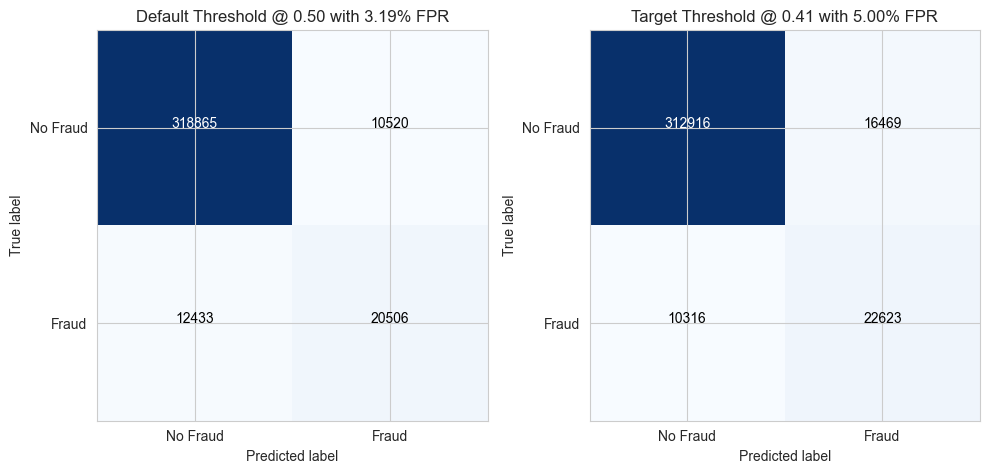

********** ADASYN **********
Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.96      0.96    329385
       Fraud       0.63      0.62      0.62     32939

    accuracy                           0.93    362324
   macro avg       0.79      0.79      0.79    362324
weighted avg       0.93      0.93      0.93    362324

Target Threshold @ 0.44 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96    329385
       Fraud       0.57      0.67      0.61     32939

    accuracy                           0.92    362324
   macro avg       0.77      0.81      0.79    362324
weighted avg       0.93      0.92      0.93    362324



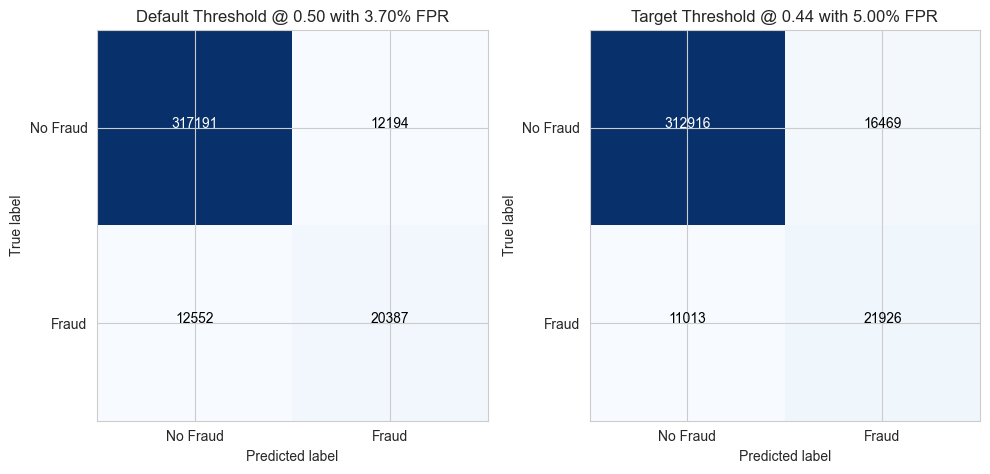

********** SMOTENC **********
Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.94      0.95    329385
       Fraud       0.52      0.66      0.58     32939

    accuracy                           0.91    362324
   macro avg       0.74      0.80      0.77    362324
weighted avg       0.92      0.91      0.92    362324

Target Threshold @ 0.55 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96    329385
       Fraud       0.56      0.63      0.59     32939

    accuracy                           0.92    362324
   macro avg       0.76      0.79      0.77    362324
weighted avg       0.93      0.92      0.92    362324



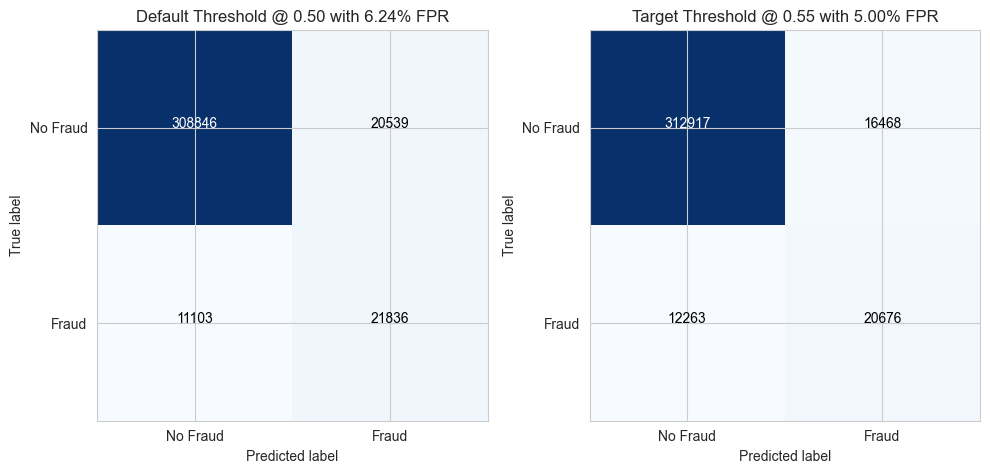

In [158]:
# Create lists of oversampling methods fpr and tpr
ov_fpr_list = []
ov_tpr_list = []

# Test the CatBoostClassifier models using the test set
index = 0
for model in oversampling_methods_models:
    print(f'********** {oversampling_methods[index]} **********')
    fpr, tpr, _, _, _, _, _, _ = test_classifier(model, X_test, y_test)
    ov_fpr_list.append(fpr)
    ov_tpr_list.append(tpr)
    index += 1

**Interpretation**

When FPR is fixed at 5%: 
* *True Positives (TP) and True Positive Rate(TPR)*: 
    * The CatBoost with SMOTE model successfully captured 22623 fraud out of 32939 fraud instances, TPR is 68.68%.
    * The CatBoost with ADASYN model successfully captured 21926 fraud out of 32939 fraud instances, TPR is 66.57%
    * The CatBoost with SMOTE model successfully captured 20676 fraud out of 32939 fraud instances, TPR is 62.77%.
* *Precision*:
    * The CatBoot with SMOTE model's no fraud precision is 0.97, fraud precision is 0.58.
    * The CatBoot with ADASYN model's no fraud precision is 0.97, fraud precision is 0.57.
    * The CatBoot with SMOTENC model's no fraud precision is 0.96, fraud precision is 0.56.
* *Recall*:
    * The CatBoot with SMOTE model's no fraud recall is 0.95, fraud recall is 0.69.
    * The CatBoot with ADASYN model's no fraud recall is 0.95, fraud recall is 0.67.
    * The CatBoot with SMOTENC model's no fraud recall is 0.95, fraud recall is 0.63.
* *f1-scorel*:
    * The CatBoot with SMOTE model's no fraud f1-score is 0.96, fraud f1-score is 0.63.
    * The CatBoot with ADASYN model's no fraud f1-score is 0.96, fraud f1-score is 0.61.
    * The CatBoot with SMOTENC model's no fraud f1-score is 0.96, fraud f1-score is 0.59.

<table>
  <tr>
    <th>Oversampler</th>
    <th>TPR</th>
    <th>Precision(NF)</th>
    <th>Precision(F)</th>
    <th>Recall(NF)</th>
    <th>Recall(F)</th>
    <th>f1-score(NF)</th>
    <th>f1-score(F)</th>
  </tr>
  <tr>
    <td>CatBoost with SMOTE</td>
    <td>68.68%</td>
    <td>0.97</td>
    <td>0.58</td>
    <td>0.95</td>
    <td>0.69</td>
    <td>0.96</td>
    <td>0.63</td>
  </tr>
  <tr>
    <td>CatBoost with ADASYN</td>
    <td>66.57%</td>
    <td>0.97</td>
    <td>0.57</td>
    <td>0.95</td>
    <td>0.67</td>
    <td>0.96</td>
    <td>0.61</td>
  </tr>
  <tr>
    <td>CatBoost with SMOTENC</td>
    <td>62.77%</td>
    <td>0.96</td>
    <td>0.56</td>
    <td>0.95</td>
    <td>0.63</td>
    <td>0.96</td>
    <td>0.59</td>
  </tr>
</table>

<b>Plotting ROC-AUC with different oversamplers in `5:5` dataset

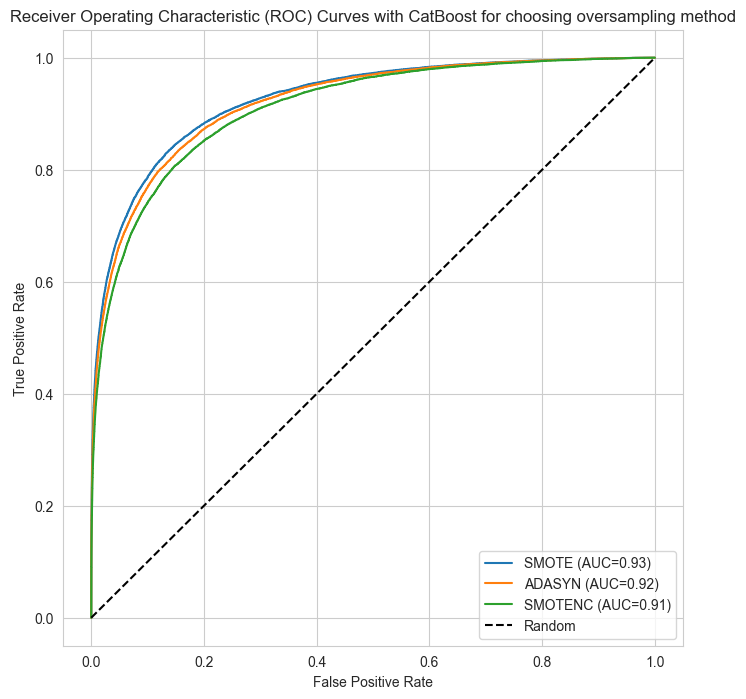

In [159]:
# Plot ROC curves for CatBoostClassifier models with different oversampling methods
plot_roc_curves(ov_fpr_list, ov_tpr_list, oversampling_methods, suffix=' with CatBoost for choosing oversampling method')

**Interpretation:**

1. The model with a higher AUC score and a ROC curve that is closer to the upper-left corner of the plot is generally considered better at distinguishing between the classes. As the figuere above shows, the CatBoost model trained with SMOTE is the closest one to the upper-left. 
2. A higher AUC score indicates better discrimination ability, where it determines which model performs better in terms of separating positive and negative instances.The CatBoost with SMOTE's AUC is 0.93, higher than other two.

<b>Plotting PRC with different oversamplers in `5:5` dataset

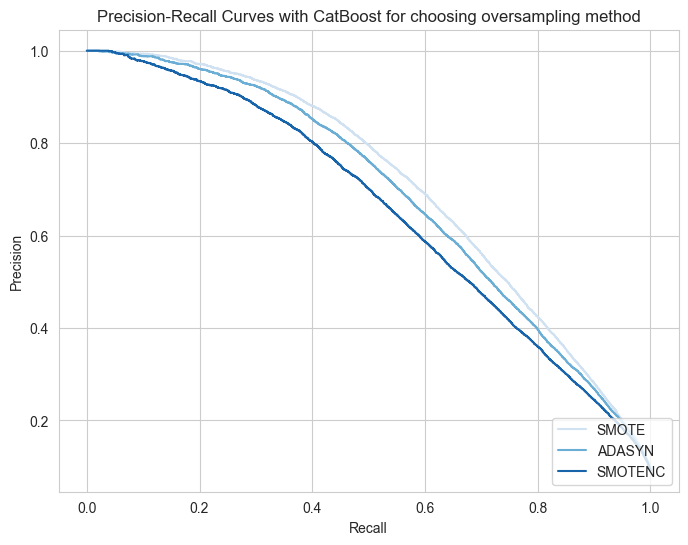

In [160]:
# Plot precision-recall curves for CatBoostClassifier models with different oversampling methods
plot_prc_curves(oversampling_methods_models, oversampling_methods, X_test, y_test, suffix=' with CatBoost for choosing oversampling method')

**Interpretation:**
1. The closer the curve is to the top-right corner, the better the model is at achieving both high precision and high recall, which in this case is CatBoost with SMOTE oversampling.
2. The steepness of the curve, especially in the early part, indicates how well the model identifies positive instances at different threshold settings. A steeper rise suggests that the model is effective at distinguishing between positive and negative cases.

<b>In conclusion for the above classification report, confusion matrix, ROC-AUC and PRC. Obviously, `SMOTE` is more suitable than `ADASYN` and `SMOTENC` in the processed combined dataset.

<br>

<a id="355"></a>

### 3.5.5 LightGBM training and evaluation

**LightGBM (Light Gradient Boosting Machine)**: This is an open-source, distributed, high-performance gradient boosting framework developed by Microsof for efficient training of decision tree algorithms on large datasets. It is particularly effective for problems with a large number of features. LightGBM is written in C++ and supports various programming languages, including Python, R, and Java. The main features of LightGBM include:
   - **Histogram-based Algorithm**: LightGBM uses a histogram-based algorithm to reduce computation time.
   - **Lower Memory Usage**: Compared to traditional gradient boosting machine methods, LightGBM significantly reduces memory usage when handling large datasets.
   - **Supports Parallel and GPU Learning**: LightGBM supports parallel processing, allowing for fast training on multi-core CPUs, and also supports GPU acceleration.
   - **Effective for Large-scale Data**: It is particularly suitable for handling a large amount of data and is faster than XGBoost when dealing with large datasets.
   - **Leaf-wise Tree Growth Strategy**: Unlike other depth-wise algorithms, LightGBM adopts a leaf-wise strategy, which can reduce more loss but may also lead to overfitting.
<br><br>

#### LightGBM Algorithm Pseudocode

```pseudocode
Initialize the model with a base value (e.g., mean of the target variable)
For each iteration in the number of boosting rounds:
    1. Construct a histogram of feature values
    2. For each leaf in the current model:
        a. Find the best split based on the histogram
        b. Split the leaf into two new leaves
    3. Update the model with these new leaves
    4. Calculate and apply gradients to update the leaf values
    5. If early stopping criteria are met, stop the iteration
Return the final model
```
<br>

#### Pseudocode for LightGBM Training

`Input: Training data (X_train, y_train), hyperparameters (params)`

##### Step 1: Create dataset
    dataset = create_dataset(X_train, label=y_train)
##### Step 2: Initialize parameters
    num_boost_round = params['num_boost_round']
    learning_rate = params['learning_rate']
    num_leaves = params['num_leaves']
    objective = params['objective']
##### Step 3: Initialize a booster
    booster = initialize_booster(num_leaves, objective)
##### Step 4: Main training loop
    for iteration in range(num_boost_round):
        Step 4.1: Calculate gradients and hessians
        gradients, hessians = calculate_gradients_and_hessians(booster, dataset)
    
        Step 4.2: Find the best split for each leaf
        best_splits = find_best_splits(booster, dataset, gradients, hessians)
    
        Step 4.3: Update tree structure
        update_tree_structure(booster, best_splits)
    
        Step 4.4: Update leaf values to minimize the objective function
        update_leaf_values(booster, dataset, gradients, hessians)
    
        Step 4.5: Update the weights of the training instances
        update_instance_weights(booster, dataset)

##### Step 5: Output the trained model (booster)
    trained_model = booster

In [161]:
# Import LightGBM
from lightgbm import LGBMClassifier

# Instantiate a LGBMClassifier model with GPU acceleration for training
lgb = LGBMClassifier(device='gpu')

##### 3.5.5.1 Training and results of datasets are splited by a ratio of `6:4`

In [162]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.4, random_state=42, stratify=y_nm) 

In [163]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [164]:
# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params_60 = {
               'lgbmclassifier__num_leaves': [3, 7, 11, 15, 19, 23, 27, 31, 35, 39],
               'lgbmclassifier__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0],
              }

In [165]:
# %%time

# Load pickled model from disk if it exists
if os.path.exists('./models/lgb_model_60.pkl'):
    lgb_model_60 = pickle.load(open('./models/lgb_model_60.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a LightGBM classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    lgb_model_60 = train_classifier(lgb, lgb_params_60, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(lgb_model_60, open('./models/lgb_model_60.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [166]:
# Output:
# [LightGBM] [Info] Number of positive: 395262, number of negative: 395262
# [LightGBM] [Info] This is the GPU trainer!!
# [LightGBM] [Info] Total Bins 3697
# [LightGBM] [Info] Number of data points in the train set: 790524, number of used features: 20
# [LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
# [LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
# [LightGBM] [Info] GPU programs have been built
# [LightGBM] [Info] Size of histogram bin entry: 8
# [LightGBM] [Info] 17 dense feature groups (15.08 MB) transferred to GPU in 0.014008 secs. 1 sparse feature groups
# [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

In [167]:
# Print the best parameters and the best score obtained from the grid search
print_cv_results(lgb_model_60)

mean_test_score: 0.915448, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 27, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.914567, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 27, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 3, 'lgbmclassifier__max_depth': 6, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.6}
mean_test_score: 0.913470, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__max_depth': 20, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.911830, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 39, 'lgbmclassifier__n_

Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96    263508
       Fraud       0.56      0.64      0.60     26351

    accuracy                           0.92    289859
   macro avg       0.76      0.80      0.78    289859
weighted avg       0.93      0.92      0.92    289859



Target Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96    263508
       Fraud       0.56      0.64      0.60     26351

    accuracy                           0.92    289859
   macro avg       0.76      0.80      0.78    289859
weighted avg       0.93      0.92      0.92    289859



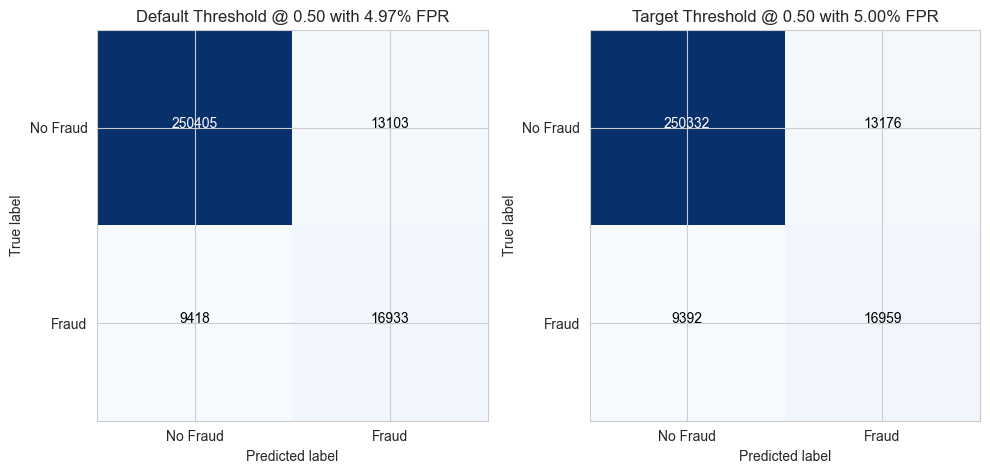

In [168]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr_60, lgb_tpr_60, lgb_default_precision_60, lgb_target_precision_60, lgb_default_recall_60, lgb_target_recall_60, lgb_default_f1_60, lgb_target_f1_60 = test_classifier(lgb_model_60, X_test, y_test)

<b> Interpretation:</b>

**For LightGBM wih 60% trainin set, when FPR is fixed at 5% (Threshhold at 0.50):**

* *True Positives (TP) and True Positive Rate(TPR)*: The LightGBM model with 60% training dataset, successfully captured 16959 out of 26351 fraud instances.The TPR is 64.35%.
* Precision: The LightGBM with 60% training dataset get 0.96 and 0.56 precision for no fraud and fraud. 
* Recall: The LightGBM with 60% training dataset get 0.95 and 0.64 recall for no fraud and fraud. 
* f1-score：The LightGBM with 60% training dataset get 0.96 and 0.60 f1-score for no fraud and no fraud. 

##### 3.5.5.2 Training and results of datasets are splited by a ratio of `75:25`

In [169]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm) 

In [170]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [171]:
# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params_75 = {
               'lgbmclassifier__num_leaves': [3, 7, 11, 15, 19, 23, 27, 31, 35, 39],
               'lgbmclassifier__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0],
              }

In [172]:
# %%time

# Load pickled model from disk if it exists
if os.path.exists('./models/lgb_model_75.pkl'):
    lgb_model_75 = pickle.load(open('./models/lgb_model_75.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a LightGBM classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    lgb_model_75 = train_classifier(lgb, lgb_params_75, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(lgb_model_75, open('./models/lgb_model_75.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [173]:
# Output from the model training:
# [LightGBM] [Info] Number of positive: 494077, number of negative: 494077
# [LightGBM] [Info] This is the GPU trainer!!
# [LightGBM] [Info] Total Bins 3698
# [LightGBM] [Info] Number of data points in the train set: 988154, number of used features: 20
# [LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
# [LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
# [LightGBM] [Info] GPU programs have been built
# [LightGBM] [Info] Size of histogram bin entry: 8
# [LightGBM] [Info] 17 dense feature groups (18.85 MB) transferred to GPU in 0.015728 secs. 1 sparse feature groups
# [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

In [174]:
print_cv_results(lgb_model_75)

mean_test_score: 0.913917, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 39, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 14, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__colsample_bytree': 0.6}
mean_test_score: 0.912826, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 35, 'lgbmclassifier__n_estimators': 60, 'lgbmclassifier__min_child_weight': 4, 'lgbmclassifier__max_depth': 6, 'lgbmclassifier__learning_rate': 0.2, 'lgbmclassifier__colsample_bytree': 0.6}
mean_test_score: 0.911345, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__num_leaves': 19, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__max_depth': 18, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__colsample_bytree': 1.0}
mean_test_score: 0.908305, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_esti

Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.94      0.95    164693
       Fraud       0.54      0.67      0.59     16469

    accuracy                           0.92    181162
   macro avg       0.75      0.80      0.77    181162
weighted avg       0.93      0.92      0.92    181162

Target Threshold @ 0.53 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96    164693
       Fraud       0.56      0.64      0.60     16469

    accuracy                           0.92    181162
   macro avg       0.76      0.80      0.78    181162
weighted avg       0.93      0.92      0.92    181162



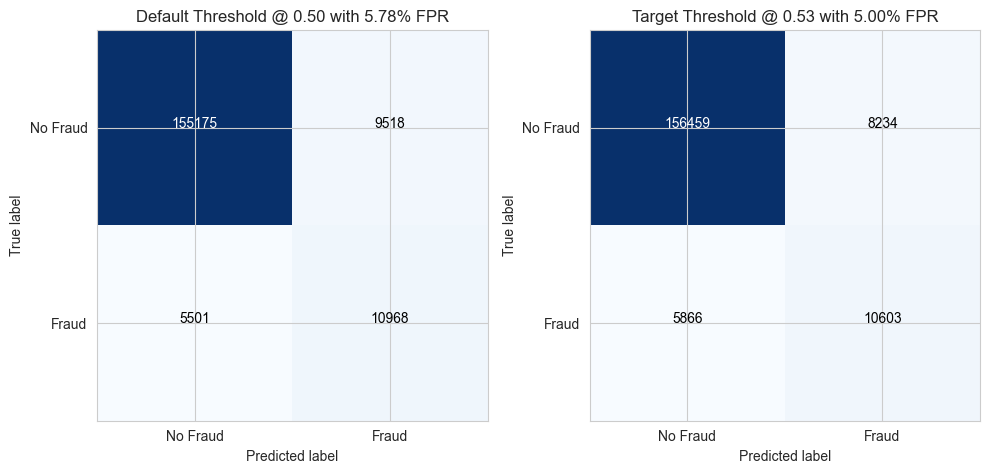

In [175]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr_75, lgb_tpr_75, lgb_default_precision_75, lgb_target_precision_75, lgb_default_recall_75, lgb_target_recall_75, lgb_default_f1_75, lgb_target_f1_75 = test_classifier(lgb_model_75, X_test, y_test)

<b> Interpretation:</b>

**For LightGBM wih 75% trainin set, when FPR is fixed at 5% (Threshhold at 0.53):**

* *True Positives (TP) and True Positive Rate(TPR)*: The LightGBM model with 75% training dataset, successfully captured 10603 out of 16469 fraud instances.The TPR is 64.38%.
* Precision: The LightGBM with 75% training dataset get 0.96 and 0.56 precision for no fraud and fraud. 
* Recall: The LightGBM with 75% training dataset get 0.95 and 0.64 recall for no fraud and fraud. 
* f1-score：The LightGBM with 75% training dataset get 0.96 and 0.60 f1-score for no fraud and no fraud. 

##### 3.5.5.3 Training and results of datasets are splited by a ratio of `9:1`

In [176]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.1, random_state=42, stratify=y_nm) 

In [177]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [178]:
# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params_90 = {
               'lgbmclassifier__num_leaves': [3, 7, 11, 15, 19, 23, 27, 31, 35, 39],
               'lgbmclassifier__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0],
              }

In [179]:
# %%time

# Load pickled model from disk if it exists
if os.path.exists('./models/lgb_model_90.pkl'):
    lgb_model_90 = pickle.load(open('./models/lgb_model_90.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a LightGBM classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    lgb_model_90 = train_classifier(lgb, lgb_params_90, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(lgb_model_90, open('./models/lgb_model_90.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [180]:
# [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
# [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
# [LightGBM] [Info] Number of positive: 592893, number of negative: 592893
# [LightGBM] [Info] This is the GPU trainer!!
# [LightGBM] [Info] Total Bins 3695
# [LightGBM] [Info] Number of data points in the train set: 1185786, number of used features: 20
# [LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
# [LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
# [LightGBM] [Info] GPU programs have been built
# [LightGBM] [Info] Size of histogram bin entry: 8
# [LightGBM] [Info] 16 dense feature groups (18.09 MB) transferred to GPU in 0.016937 secs. 1 sparse feature groups
# [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

In [181]:
# print the best parameters and the best score obtained from the grid search
print_cv_results(lgb_model_90)

mean_test_score: 0.921419, params: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 3, 'lgbmclassifier__max_depth': 12, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.6}
mean_test_score: 0.913328, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 4, 'lgbmclassifier__max_depth': 16, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.910011, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__num_leaves': 23, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__max_depth': 12, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.908464, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__num_leaves': 23, 'lgbmclassifier__n_es

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.94      0.95     65877
       Fraud       0.54      0.70      0.61      6588

    accuracy                           0.92     72465
   macro avg       0.75      0.82      0.78     72465
weighted avg       0.93      0.92      0.92     72465

Target Threshold @ 0.54 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96     65877
       Fraud       0.57      0.67      0.61      6588

    accuracy                           0.92     72465
   macro avg       0.77      0.81      0.7

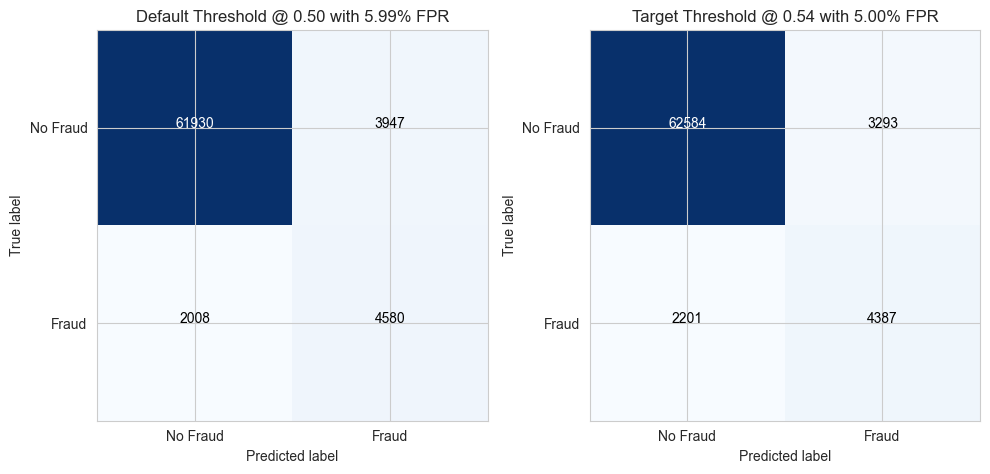

In [182]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr_90, lgb_tpr_90, lgb_default_precision_90, lgb_target_precision_90, lgb_default_recall_90, lgb_target_recall_90, lgb_default_f1_90, lgb_target_f1_90 = test_classifier(lgb_model_90, X_test, y_test)

<b> Interpretation:</b>

**For LightGBM wih 90% trainin set, when FPR is fixed at 5% (Threshhold at 0.54):**

* *True Positives (TP) and True Positive Rate(TPR)*: The LightGBM model with 90% training dataset, successfully captured 4387 out of 6588 fraud instances.The TPR is 66.59%.
* Precision: The LightGBM with 90% training dataset get 0.97 and 0.57 precision for no fraud and fraud. 
* Recall: The LightGBM with 90% training dataset get 0.95 and 0.67 recall for no fraud and fraud. 
* f1-score：The LightGBM with 90% training dataset get 0.96 and 0.61 f1-score for no fraud and no fraud. 

##### 3.5.5.4 Comparing the evaluation results of the test set under different training set and test set ratios of LightBoost

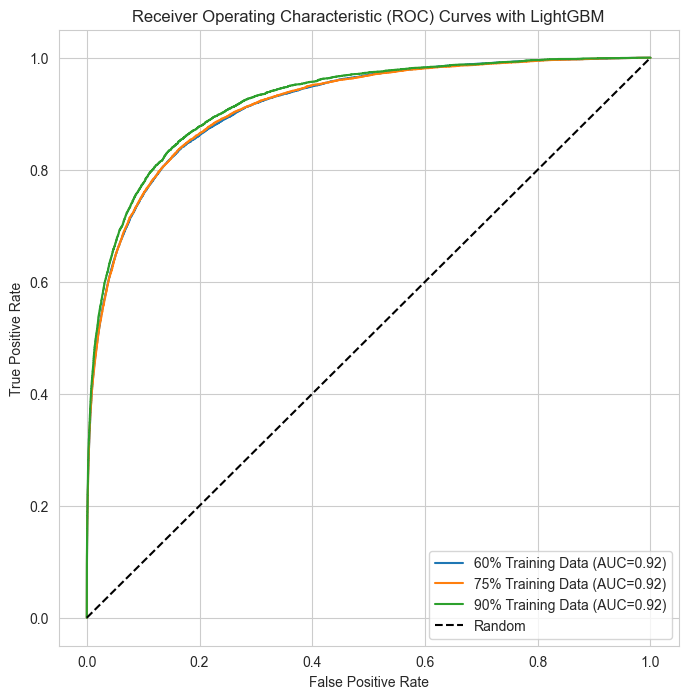

In [183]:
# Create lists of FRP and TPR values for all three models
fpr_list = [lgb_fpr_60, lgb_fpr_75, lgb_fpr_90]
tpr_list = [lgb_tpr_60, lgb_tpr_75, lgb_tpr_90]

# Create a list of model names
model_names = ['60% Training Data', '75% Training Data', '90% Training Data']

# Plot ROC curves for all three models
plot_roc_curves(fpr_list, tpr_list, model_names, suffix=' with LightGBM')

<table>
  <tr>
    <th>Models</th>
    <th>TPR (Gap)</th>
    <th>Precision(NF) (Gap)</th>
    <th>Precision(F) (Gap)</th>
    <th>Recall(NF) (Gap)</th>
    <th>Recall(F) (Gap)</th>
    <th>f1-score(NF) (Gap)</th>
    <th>f1-score(F) (Gap)</th>
    <th>Avg</th>
  </tr>
  <tr>
    <td>LightGBM(60)</td>
    <td>64.35%</td>
    <td>0.96</td>
    <td>0.56</td>
    <td>0.95</td>
    <td>0.64</td>
    <td>0.96</td>
    <td>0.60</td>
    <td></td>
  </tr>
  <tr>
    <td>LightGBM(75)</td>
    <td>64.38% (+0.03%)</td>
    <td>0.96 </td>
    <td>0.56</td>
    <td>0.95</td>
    <td>0.64</td>
    <td>0.96</td>
    <td>0.60</td>
    <td></td>
  </tr>
  <tr>
    <td>LightGBM(90)</td>
    <td>68.60% (+4.22%)</td>
    <td>0.97 (+0.01)</td>
    <td>0.58 (+0.02)</td>
    <td>0.95</td>
    <td>0.69 (+0.05)</td>
    <td>0.96 </td>
    <td>0.63 (+0.03)</td>
    <td></td>
  </tr>
</table>

<br>

<a id="356"></a>

### 3.5.6 XGBoost training and evaluation

**XGBoost (eXtreme Gradient Boosting)**: This is another popular and powerful gradient-boosted decision tree algorithm for machine learning. Similar to LightGBM, XGBoost is designed for speed and performance, and it has been widely used in various data science competitions and industrial applications. Its main features include:
   - **Gradient Boosting Framework**: XGBoost uses a gradient boosting framework, where new models are built based on the gradient of errors of previous models.
   - **Efficient, Scalable, and Flexible**: XGBoost optimizes computational speed and resource efficiency, can handle large-scale data, and supports various objective functions and evaluation criteria.
   - **Regularization**: XGBoost introduces regularization terms in its objective function, which helps in reducing overfitting of the model.
   - **Handling Missing Values and Sparse Data**: XGBoost can automatically handle missing values and is effective with sparse data (like high-dimensional data arising from matrix sparsity).

#### XGBoost Algorithm Pseudocode
```pseudocode
Initialize model with a base learner (typically a decision tree)
For each boosting round:
    1. Compute the gradient and hessian of the loss function with respect to each training instance
    2. Build a new tree based on the gradients and hessians to minimize the loss
        a. For each tree node, select the best split based on gain calculation
        b. Prune the tree using gamma (regularization parameter)
    3. Update the model by adding the new tree weighted by a learning rate
    4. If early stopping criteria are met (based on evaluation metric on a validation set), stop training
Return the final boosted model
```

##### Pseudocode for XGBoost Training
###### Input: Training data (X_train, y_train), hyperparameters (params)
###### Step 1: Initialize model parameters
    num_boost_round = params['num_boost_round']
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    subsample = params['subsample']
    colsample_bytree = params['colsample_bytree']
    objective = params['objective']
    
###### Step 2: Initialize the model with an empty ensemble (F0)
    F0 = initialize_ensemble()

###### Step 3: Main training loop
    for iteration in range(num_boost_round):
        Step 3.1: Compute negative gradient (residuals) for current ensemble
        gradients = compute_gradients(F0, y_train)

        Step 3.2: Fit a weak learner (tree) to the negative gradient
        tree = fit_weak_learner(X_train, gradients, max_depth, subsample, colsample_bytree)

        Step 3.3: Update the ensemble with the new weak learner
        F0 = update_ensemble(F0, tree, learning_rate)

###### Step 4: Output the trained model (ensemble)
    trained_model = F0

In [184]:
# Import XGBoost
from xgboost import XGBClassifier

# Instantiate a XGBClassifier model with GPU acceleration for training
xgb = XGBClassifier(device='cuda')

# Define a dictionary of hyperparameters for XGBClassifier
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

##### 3.5.6.1 Training and results of datasets are splited by a ratio of `6:4`

In [185]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.4, random_state=42, stratify=y_nm) 

In [186]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [187]:
# Define a dictionary of hyperparameters for XGBClassifier
xgb_params_60 = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [188]:
# %%time

# Load the pickled model from disk if it exists
if os.path.exists('./models/xgb_model_60.pkl'):
    xgb_model_60 = pickle.load(open('./models/xgb_model_60.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a XGBoost classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    xgb_model_60 = train_classifier(xgb, xgb_params_60, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(xgb_model_60, open('./models/xgb_model_60.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [189]:
print_cv_results(xgb_model_60)

mean_test_score: 0.923967, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 40, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.922524, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 60, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.916563, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.912779, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 1

Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.96      0.96    263508
       Fraud       0.64      0.64      0.64     26351

    accuracy                           0.93    289859
   macro avg       0.80      0.80      0.80    289859
weighted avg       0.93      0.93      0.93    289859

Target Threshold @ 0.44 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96    263508
       Fraud       0.58      0.69      0.63     26351

    accuracy                           0.93    289859
   macro avg       0.77      0.82      0.79    289859
weighted avg       0.93      0.93      0.93    289859



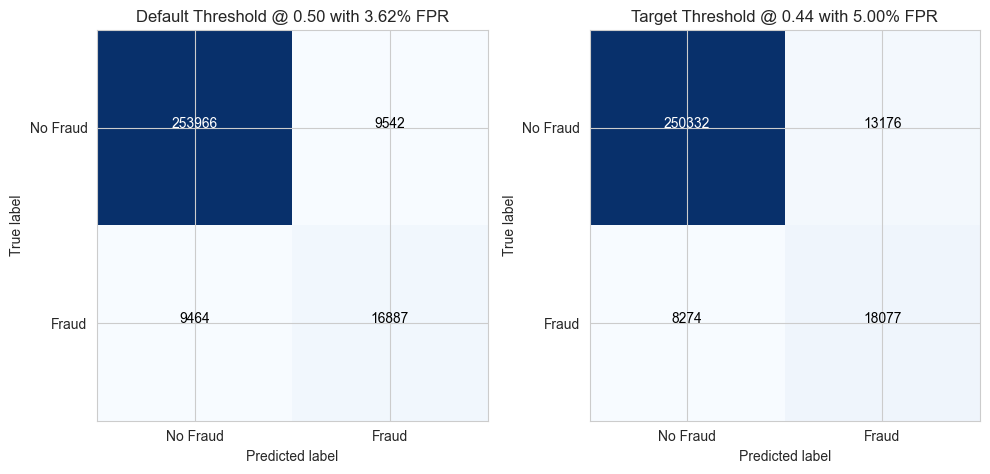

In [190]:
# Testing the XGBoost model using the test data and calculating metrics
xgb_fpr_60, xgb_tpr_60, xgb_default_precision_60, xgb_target_precision_60, xgb_default_recall_60, xgb_target_recall_60, xgb_default_f1_60, xgb_target_f1_60 = test_classifier(xgb_model_60, X_test, y_test)

<b> Interpretation:</b>

**For XGBoost wih 60% trainin set, when FPR is fixed at 5% (Threshhold at 0.44):**

* *True Positives (TP) and True Positive Rate(TPR)*: The XGBoost model with 60% training dataset, successfully captured 18077 out of 26351 fraud instances.The TPR is 68.60%.
* Precision: The XGBoost with 60% training dataset get 0.97 and 0.58 precision for no fraud and fraud. 
* Recall: The XGBoost with 60% training dataset get 0.95 and 0.69 recall for no fraud and fraud. 
* f1-score：The LightGBM with 60% training dataset get 0.96 and 0.63 f1-score for no fraud and no fraud. 

##### 3.5.6.2 Training and results of datasets are splited by a ratio of `75:25`

In [191]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm) 

In [192]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [193]:
# Define a dictionary of hyperparameters for XGBClassifier
xgb_params_75 = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [194]:
# %% time

# Load the pickled model from disk if it exists
if os.path.exists('./models/xgb_model_75.pkl'):
    xgb_model_75 = pickle.load(open('./models/xgb_model_75.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a XGBoost classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    xgb_model_75 = train_classifier(xgb, xgb_params_75, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(xgb_model_75, open('./models/xgb_model_75.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [195]:
# print the best parameters and the best score obtained from the grid search
print_cv_results(xgb_model_75)

mean_test_score: 0.947697, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.937596, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.930159, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.925412, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 60, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 

Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.98      0.98    164693
       Fraud       0.78      0.71      0.74     16469

    accuracy                           0.96    181162
   macro avg       0.87      0.85      0.86    181162
weighted avg       0.95      0.96      0.95    181162

Target Threshold @ 0.33 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.95      0.96    164693
       Fraud       0.61      0.80      0.69     16469

    accuracy                           0.94    181162
   macro avg       0.80      0.87      0.83    181162
weighted avg       0.95      0.94      0.94    181162



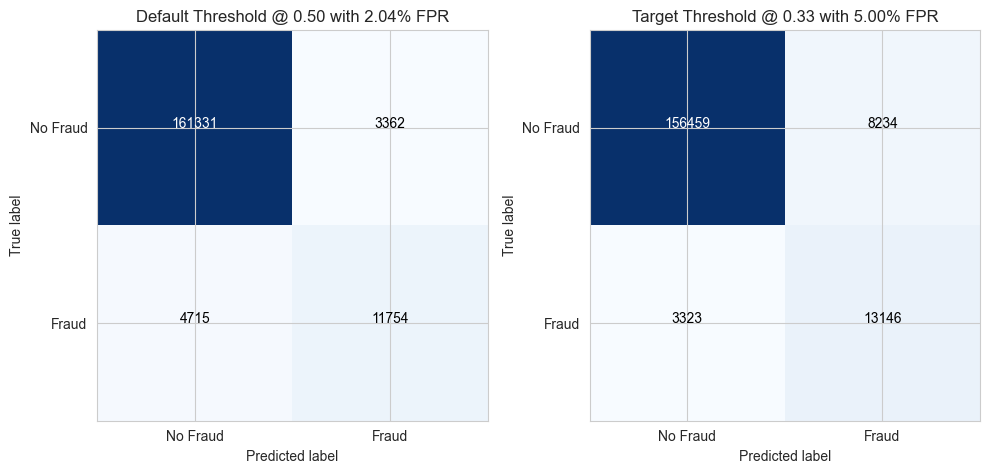

In [196]:
# Testing the LightGBM model using the test data and calculating metrics
xgb_fpr_75, xgb_tpr_75, xgb_default_precision_75, xgb_target_precision_75, xgb_default_recall_75, xgb_target_recall_75, xgb_default_f1_75, xgb_target_f1_75 = test_classifier(xgb_model_75, X_test, y_test)

<b> Interpretation:</b>

**For XGBoost wih 75% trainin set, when FPR is fixed at 5% (Threshhold at 0.33):**

* *True Positives (TP) and True Positive Rate(TPR)*: The XGBoost model with 75% training dataset, successfully captured 13146 out of 16469 fraud instances.The TPR is 79.82%.
* Precision: The XGBoost with 75% training dataset get 0.98 and 0.61 precision for no fraud and fraud. 
* Recall: The XGBoost with 75% training dataset get 0.95 and 0.80 recall for no fraud and fraud. 
* f1-score：The LightGBM with 75% training dataset get 0.96 and 0.69 f1-score for no fraud and no fraud. 

##### 3.5.6.3 Training and results of datasets are splited by a ratio of `9:1`

In [197]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.1, random_state=42, stratify=y_nm) 

In [198]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]
print(encoded_features)

[13, 14, 15, 16, 17, 18, 19]


In [199]:
# Define a dictionary of hyperparameters for XGBClassifier
xgb_params_90 = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [200]:
# %% time

# Load the pickled model from disk if it exists
if os.path.exists('./models/xgb_model_90.pkl'):
    xgb_model_90 = pickle.load(open('./models/xgb_model_90.pkl', 'rb'))
    print("Model loaded from disk successfully.")
else:
    # if the pickled model does not exist, train a XGBoost classifier using 'train_classifier' function and the given parameters
    print("Model does not exist. Training a new model...")
    xgb_model_90 = train_classifier(xgb, xgb_params_90, X_train, y_train, encoded_features)
    # Pickle the model
    pickle.dump(xgb_model_90, open('./models/xgb_model_90.pkl', 'wb'))
    print("Model trained and saved successfully.")

Model loaded from disk successfully.


In [201]:
# print the best parameters and the best score obtained from the grid search
print_cv_results(xgb_model_90)

mean_test_score: 0.950133, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.946010, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.927262, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.919416, params: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree':

Default Threshold @ 0.50 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.98      0.98     65877
       Fraud       0.76      0.74      0.75      6588

    accuracy                           0.95     72465
   macro avg       0.87      0.86      0.86     72465
weighted avg       0.95      0.95      0.95     72465

Target Threshold @ 0.35 
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.95      0.97     65877
       Fraud       0.62      0.82      0.70      6588

    accuracy                           0.94     72465
   macro avg       0.80      0.88      0.83     72465
weighted avg       0.95      0.94      0.94     72465



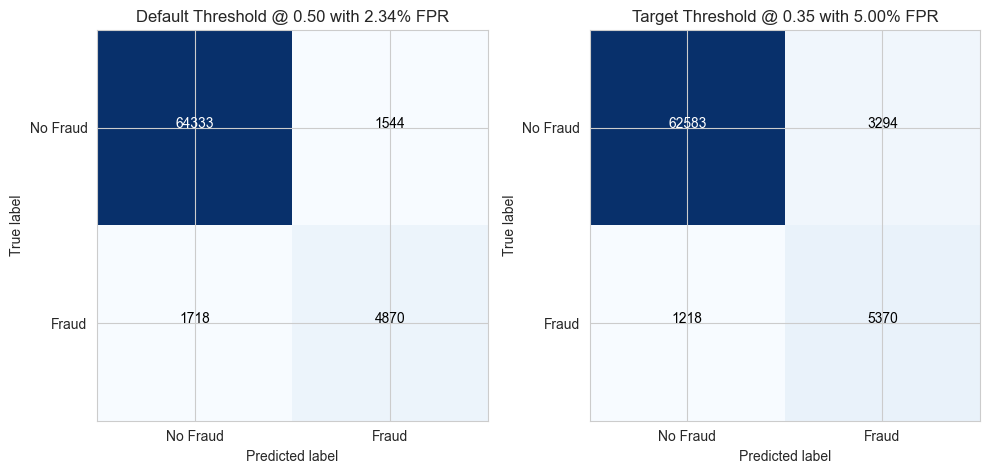

In [202]:
# Testing the LightGBM model using the test data and calculating metrics
xgb_fpr_90, xgb_tpr_90, xgb_default_precision_90, xgb_target_precision_90, xgb_default_recall_90, xgb_target_recall_90, xgb_default_f1_90, xgb_target_f1_90 = test_classifier(xgb_model_90, X_test, y_test)

<b> Interpretation:</b>

**For XGBoost wih 90% trainin set, when FPR is fixed at 5% (Threshhold at 0.35):**

* *True Positives (TP) and True Positive Rate(TPR)*: The XGBoost model with 90% training dataset, successfully captured 5307 out of 6588 fraud instances.The TPR is 80.56%.
* Precision: The XGBoost with 90% training dataset get 0.98 and 0.62 precision for no fraud and fraud. 
* Recall: The XGBoost with 90% training dataset get 0.95 and 0.82 recall for no fraud and fraud. 
* f1-score：The LightGBM with 75% training dataset get 0.97 and 0.70 f1-score for no fraud and no fraud. 

##### 3.5.6.4 Comparing the evaluation results of the test set under different training set and test set ratios of XGBoost

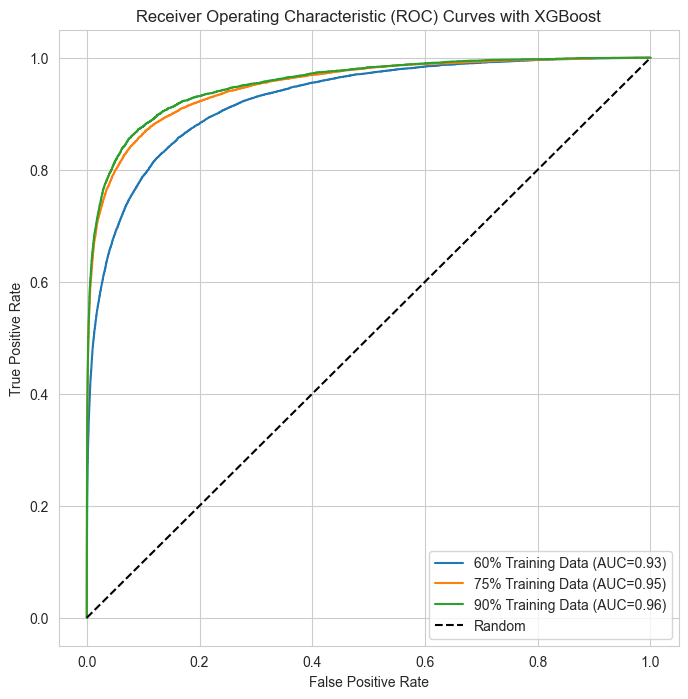

In [203]:
# Create lists of FRP and TPR values for all three models
fpr_list = [xgb_fpr_60, xgb_fpr_75, xgb_fpr_90]
tpr_list = [xgb_tpr_60, xgb_tpr_75, xgb_tpr_90]

# Create a list of model names
model_names = ['60% Training Data', '75% Training Data', '90% Training Data']

# Plot ROC curves for all three models
plot_roc_curves(fpr_list, tpr_list, model_names, suffix=' with XGBoost')

<table>
  <tr>
    <th>Models</th>
    <th>TPR (Gap)</th>
    <th>Precision(NF) (Gap)</th>
    <th>Precision(F) (Gap)</th>
    <th>Recall(NF) (Gap)</th>
    <th>Recall(F) (Gap)</th>
    <th>f1-score(NF) (Gap)</th>
    <th>f1-score(F) (Gap)</th>
    <th>Avg</th>
  </tr>
  <tr>
    <td>XGBoost(60)</td>
    <td>68.60%</td>
    <td>0.97</td>
    <td>0.58</td>
    <td>0.95</td>
    <td>0.69</td>
    <td>0.96</td>
    <td>0.63</td>
    <td></td>
  </tr>
  <tr>
    <td>XGBoost(75)</td>
    <td>79.82%</td>
    <td>0.98</td>
    <td>0.61</td>
    <td>0.95</td>
    <td>0.80</td>
    <td>0.96</td>
    <td>0.69</td>
    <td></td>
  </tr>
  <tr>
    <td>XGBoost(90)</td>
    <td>80.56%</td>
    <td>0.98</td>
    <td>0.62</td>
    <td>0.95</td>
    <td>0.82</td>
    <td>0.96</td>
    <td>0.70</td>
    <td></td>
  </tr>
</table>

<a id="357"></a>

### 3.5.7 Model Evaluation for Fraud Detection

Model evaluation involves assessing the performance of machine learning models which in this case is between LightGBM and XGBoost, in identifying and classifying fraudulent activities. Both LightGBM and XGBoost are popular gradient boosting frameworks known for their efficiency and effectiveness in handling complex datasets.


#### 3.5.7.1 Plotting ROC Curves and Comparing AUC Scores

##### <b>Results of datasets are splited by a ratio of `6:4`

At the ratio of 6:4, which is when the dataset is split into training and testing sets is commonly in a ratio at 60% training, 40% testing.

The ROC curve is a graphical representation of the trade-off between true positive rate(sensitivity) and false positive rate (1-specificity) at various thresholds. It helps visualize the model's ability to discriminate between the positive and negative classes across different probability thresholds.

AUC is the area under the ROC curve, and it provides a single scalar value summarizing the model's overall performance. An AUC score closer to 1 indicates better performance.

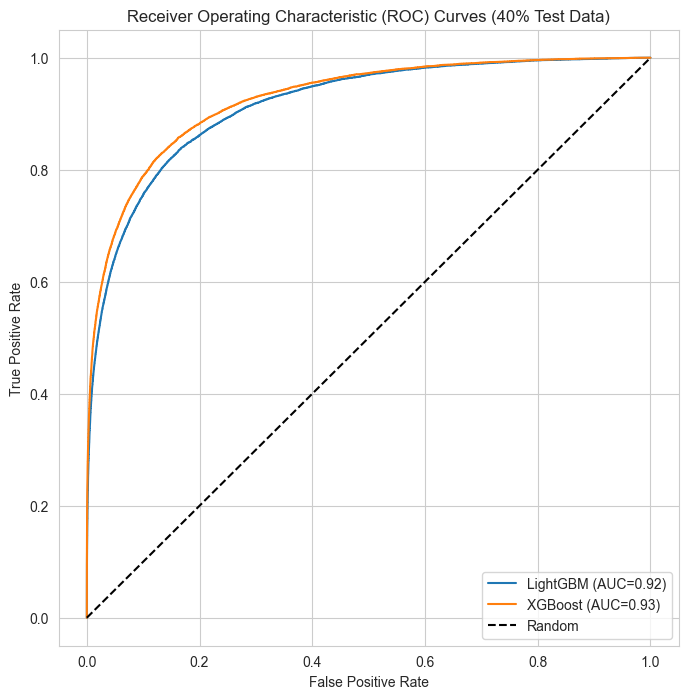

In [204]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [lgb_fpr_60, xgb_fpr_60]
tpr_list = [ lgb_tpr_60, xgb_tpr_60,]

# Create a list of labels for each classifier
label_list = ['LightGBM', 'XGBoost']

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list, suffix=' (40% Test Data)')

**Interpretation:**

1. The model with a higher AUC score and a ROC curve that is closer to the upper-left corner of the plot is generally considered better at distinguishing between the classes, which in this case is XGBoost at a AUC score of 0.93.
2. A higher AUC score indicates better discrimination ability, where it determines which model performs better in terms of separating positive and negative instances.


##### <b>Results of datasets are splited by a ratio of `75:25`

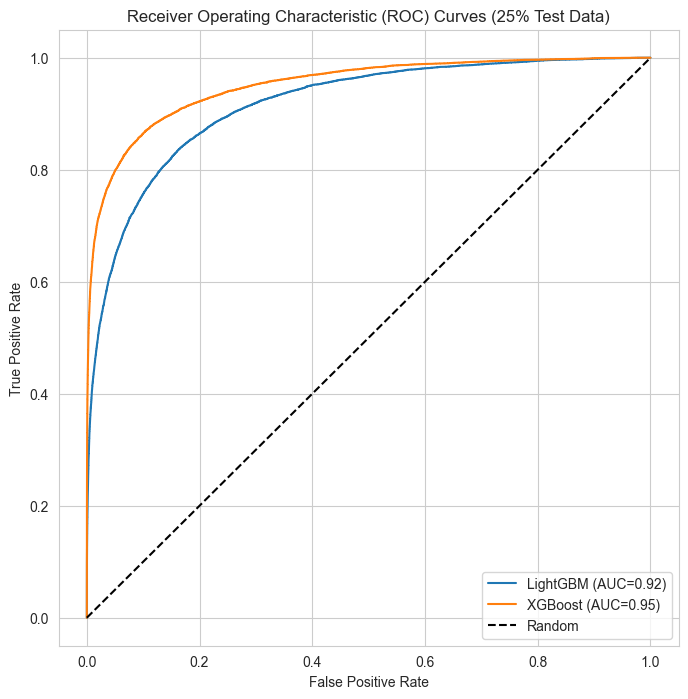

In [205]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [lgb_fpr_75, xgb_fpr_75]
tpr_list = [ lgb_tpr_75, xgb_tpr_75]

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list, suffix=' (25% Test Data)')

**Interpretation:**
1. A higher AUC score and a ROC curve closer to the upper-left corner of the plot indicate better model performance, which in this case is XGBoost at a AUC score of 0.95.
2. The comparison of AUC scores helps in selecting the model that is more effective in distinguishing between the positive and negative classes.
3. With a 75:25 split, there's a larger training set, which can be advantageous for model learning. However, the smaller testing set might lead to higher variability in performance evaluation compared to larger testing sets.

##### <b>Results of datasets are splited by a ratio of `9:1`

When the dataset is split into a ratio of  9:1 (90% training, 10% testing), it means that a larger portion of the data is used for training the machine learning models, leaving a smaller portion for evaluating their performance.

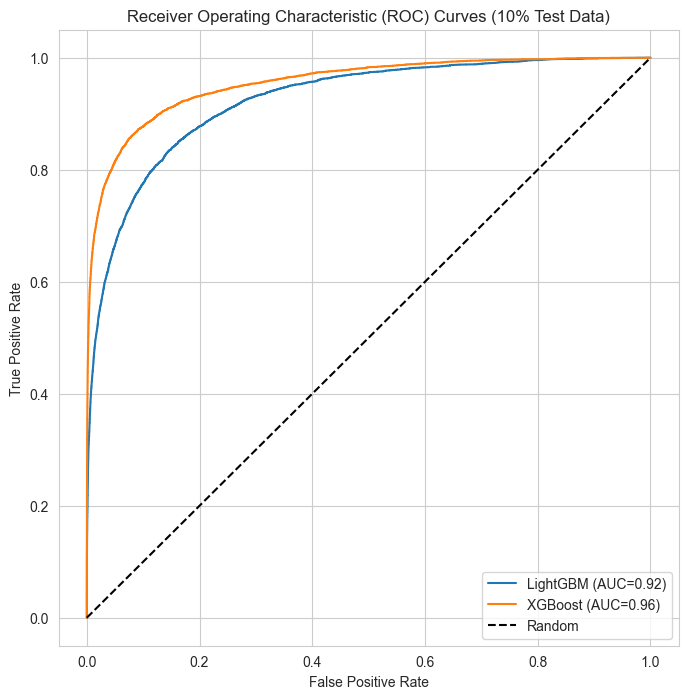

In [206]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [lgb_fpr_90, xgb_fpr_90]
tpr_list = [ lgb_tpr_90, xgb_tpr_90]

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list, suffix=' (10% Test Data)')

**Interpretation:**
1. XGBoost has a better model performance in a 9:1 split where it has a AUC score of 0.96, which is higher than LightGBM at a score of 0.92.
2. With a 9:1 split, there is a substantial training set, which can lead to well-learned models. However, the small testing set may introduce higher variability in the performance evaluation.

#### 3.5.7.2 Ploting PRC Curves for Fraud Class at Threshold

Precision-Recall Curves (PRC) are used to evaluate the performance of classification models, particularly in situations where there is an imbalance between the classes, as is often the case in fraud detection. The PRC focuses on the trade-off between precision and recall at different probability thresholds. Let's explore how to compare LightGBM and XGBoost using PRC curves for the fraud class:

##### <b>Results of datasets are splited by a ratio of `6:4`

In [207]:
# Split the resampled data into training and testing sets using 40% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.4, random_state=42, stratify=y_nm) 

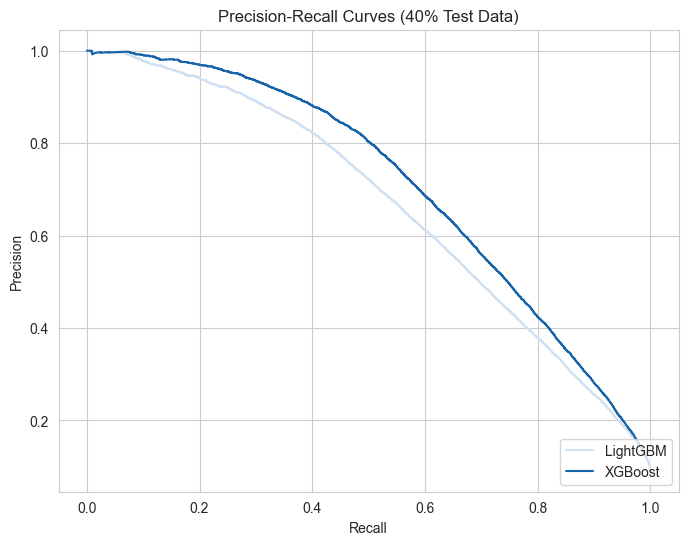

In [208]:
# Plot precision-recall curves for each classifier
model_60_list = [lgb_model_60, xgb_model_60]
model_60_name_list = ['LightGBM', 'XGBoost']
plot_prc_curves(model_60_list, model_60_name_list, X_test, y_test, suffix=' (40% Test Data)')

**Interpretation:**
1. The closer the curve is to the top-right corner, the better the model is at achieving both high precision and high recall, which in this case is XGBoost.
2. The steepness of the curve, especially in the early part, indicates how well the model identifies positive instances at different threshold settings. A steeper rise suggests that the model is effective at distinguishing between positive and negative cases.

##### <b>Results of datasets are splited by a ratio of `75:25`

In [209]:
# Split the resampled data into training and testing sets using 25% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

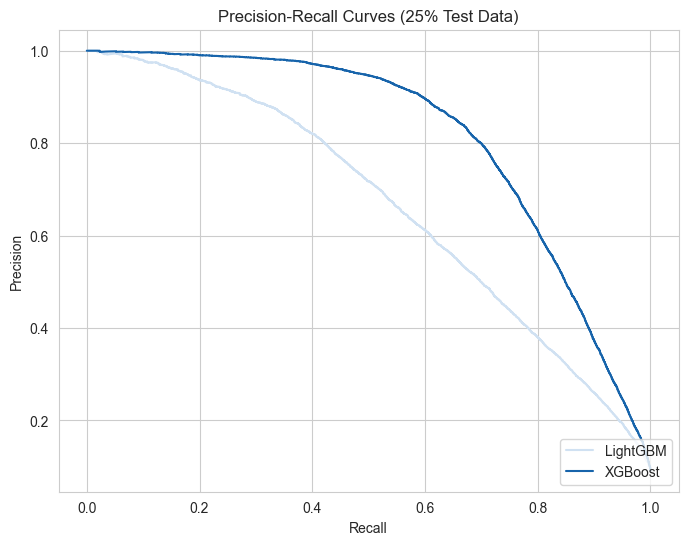

In [210]:
# Plot precision-recall curves for each classifier
model_75_list = [lgb_model_75, xgb_model_75]
model_75_name_list = ['LightGBM', 'XGBoost']
plot_prc_curves(model_75_list, model_75_name_list, X_test, y_test, suffix=' (25% Test Data)')

**Interpretation:**
1. The closer the curve is to the top-right corner, the better the model is at achieving both high precision and high recall, which in this case is XGBoost by alot.
2. A steeper initial rise in the PRC curve indicates that a model is effective at identifying positive instances early on as the threshold decreases.

##### <b>Results of datasets are splited by a ratio of `9:1`

In [211]:
# Split the resampled data into training and testing sets using 10% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.1, random_state=42, stratify=y_nm)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


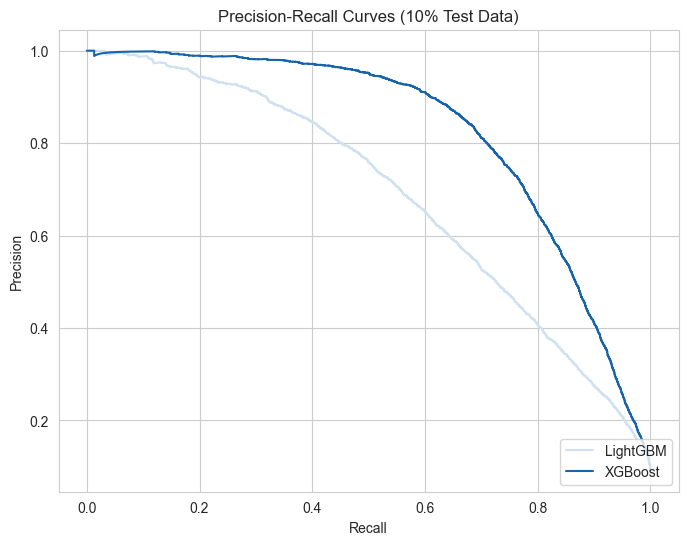

In [212]:
# Plot precision-recall curves for each classifier
model_90_list = [lgb_model_90, xgb_model_90]
model_90_name_list = ['LightGBM', 'XGBoost']
plot_prc_curves(model_90_list, model_90_name_list, X_test, y_test, suffix=' (10% Test Data)')

**Interpretation:**
1.  At a ratio of 9:1 (90% training, 10% testing), XGBoost is the better the model is at achieving both high precision and high recall, as the curve is closer to the top right corner.
2. With a small testing set, individual instances can have a relatively significant impact on the precision and recall values. The results may be more sensitive to outliers or specific characteristics of the test set. The curve may exhibit more pronounced fluctuations as the threshold varies.

#### 3.5.7.3 Precison, Recall, f1-score for Fraud Class at Taget Threshholds with 5% FPR

##### <b>Results of datasets are splited by a ratio of `6:4`

<table>
  <tr>
    <th>Models</th>
    <th>TPR</th>
    <th>Precision(NF)</th>
    <th>Precision(F)</th>
    <th>Recall(NF)</th>
    <th>Recall(F)</th>
    <th>f1-score(NF)</th>
    <th>f1-score(F)</th>
    <th>Avg</th>
  </tr>
  <tr>
    <td>LightGBM(60)</td>
    <td>64.35%</td>
    <td>0.96</td>
    <td>0.56</td>
    <td>0.95</td>
    <td>0.64</td>
    <td>0.96</td>
    <td>0.60</td>
    <td></td>
  </tr>
  <tr>
    <td>XGBoost(60)</td>
    <td>68.60%</td>
    <td>0.97</td>
    <td>0.58</td>
    <td>0.95</td>
    <td>0.69</td>
    <td>0.96</td>
    <td>0.63</td>
    <td></td>
  </tr>
  <tr>
    <td>Gap</td>
    <td>4.25%</td>
    <td>0.01</td>
    <td>0.02</td>
    <td>0.</td>
    <td>0.05</td>
    <td>0.</td>
    <td>0.03</td>
    <td>2.18%</td>
  </tr>
</table>

##### <b>Results of datasets are splited by a ratio of `75:25`

<table>
  <tr>
    <th>Models</th>
    <th>TPR</th>
    <th>Precision(NF)</th>
    <th>Precision(F)</th>
    <th>Recall(NF)</th>
    <th>Recall(F)</th>
    <th>f1-score(NF)</th>
    <th>f1-score(F)</th>
    <th>Avg</th>
  </tr>
  <tr>
    <td>LightGBM(75)</td>
    <td>64.38%</td>
    <td>0.96</td>
    <td>0.56</td>
    <td>0.95</td>
    <td>0.64</td>
    <td>0.96</td>
    <td>0.60</td>
    <td></td>
  </tr>
  <tr>
    <td>XGBoost(75)</td>
    <td>79.82%</td>
    <td>0.98</td>
    <td>0.61</td>
    <td>0.95</td>
    <td>0.80</td>
    <td>0.96</td>
    <td>0.69</td>
    <td></td>
  </tr>
  <tr>
    <td>Gap</td>
    <td>15.44%</td>
    <td>0.02</td>
    <td>0.05</td>
    <td>0.</td>
    <td>0.16</td>
    <td>0.</td>
    <td>0.09</td>
    <td>6.78%</td>
  </tr>
</table>

##### <b>Results of datasets are splited by a ratio of `9:1`

<table>
  <tr>
    <th>Models</th>
    <th>TPR</th>
    <th>Precision(NF)</th>
    <th>Precision(F)</th>
    <th>Recall(NF)</th>
    <th>Recall(F)</th>
    <th>f1-score(NF)</th>
    <th>f1-score(F)</th>
    <th>Avg</th>
  </tr>
  <tr>
    <td>LightGBM(90)</td>
    <td>68.60%</td>
    <td>0.97</td>
    <td>0.58</td>
    <td>0.95</td>
    <td>0.69</td>
    <td>0.96</td>
    <td>0.63</td>
    <td></td>
  </tr>
  <tr>
    <td>XGBoost(90)</td>
    <td>80.56%</td>
    <td>0.98</td>
    <td>0.62</td>
    <td>0.95</td>
    <td>0.82</td>
    <td>0.97</td>
    <td>0.70</td>
    <td></td>
  </tr>
  <tr>
    <td>Gap</td>
    <td>11.96%</td>
    <td>0.01</td>
    <td>0.04</td>
    <td>0.</td>
    <td>0.13</td>
    <td>0.01</td>
    <td>0.07</td>
    <td>5.42%</td>
  </tr>
</table>

Overall, based on the results summarized in the table above, we find that XGBoost outperforms LightGBM in detecting fraud for a fixed 5% FPR when faced with the processed combined BAF fraud detection task.After averaging the lead for TPR, Precision, Recall, f1-score XGBoost outperforms LightGBM by 2 to 7 percentage points in the training test set using different training ratios.
<br><br>

#### 3.5.7.4 Plotting Precision Scores for Fraud Class at Default and Target Thresholds

Precision Scores is a visual representation that allows us to compare how well a model performs in terms of precision at different decision thresholds. Precision scores are calculated for both the default threshold and a target threshold, which is often selected based on the trade-off between precision and recall that aligns with the requirements.

The bar corresponding to the default threshold shows the precision achieved by each model when the default threshold is applied. This gives an indication of the model's out-of-the-box performance without threshold tuning.

The bar corresponding to the target threshold shows the precision achieved by each model when the threshold is adjusted to optimize for the specific needs of the application, such as minimizing false positives in fraud detection.

In [213]:
def plot_precision_scores(data, suffix=''):
    # Sort the data by the threshold recall score in descending order
    data = data.sort_values(by='Target Threshold Precision Score', ascending=False)

    # Reshape the data
    data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

    # Set up plot
    plt.figure(figsize=(16, 8))

    # Create grouped bar plot
    sns.barplot(
        data=data,
        x='Model',
        y='Score',
        hue='Metric',
        palette=my_palette,
        alpha=.6,
    )

    # Customize labels and legend
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Precision Score", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f"Precision Scores for Fraud Class by Model and Threshold{suffix}", fontsize=14)
    plt.legend(title="Metric", fontsize=10)

    # Display plot
    plt.show()

##### <b>Results of datasets are splited by a ratio of `6:4`

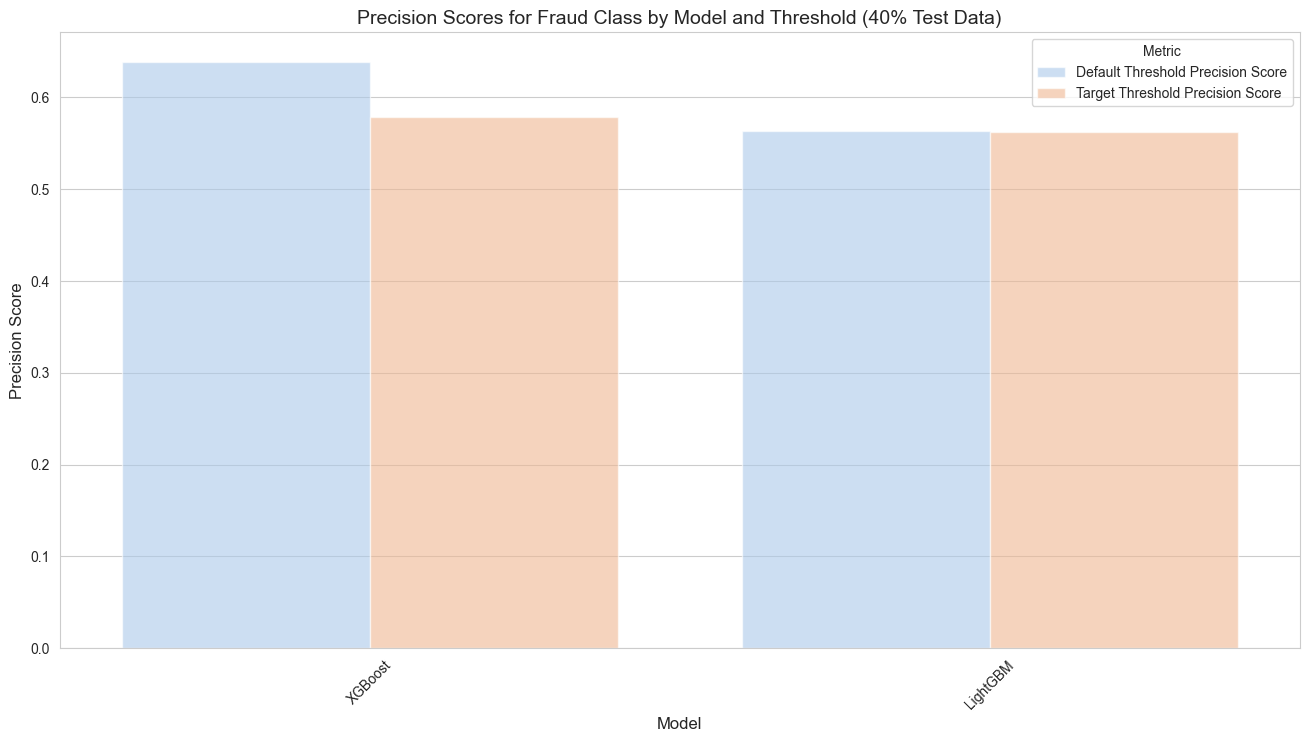

In [221]:
# Create a dataframe of the precision scores for each model
data_60 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Threshold Precision Score': [lgb_default_precision_60[1], xgb_default_precision_60[1]],
    'Target Threshold Precision Score': [lgb_target_precision_60[1], xgb_target_precision_60[1]]
})

# Plot the precision scores for each model
plot_precision_scores(data_60, suffix=' (40% Test Data)')

##### <b>Results of datasets are splited by a ratio of `75:25`

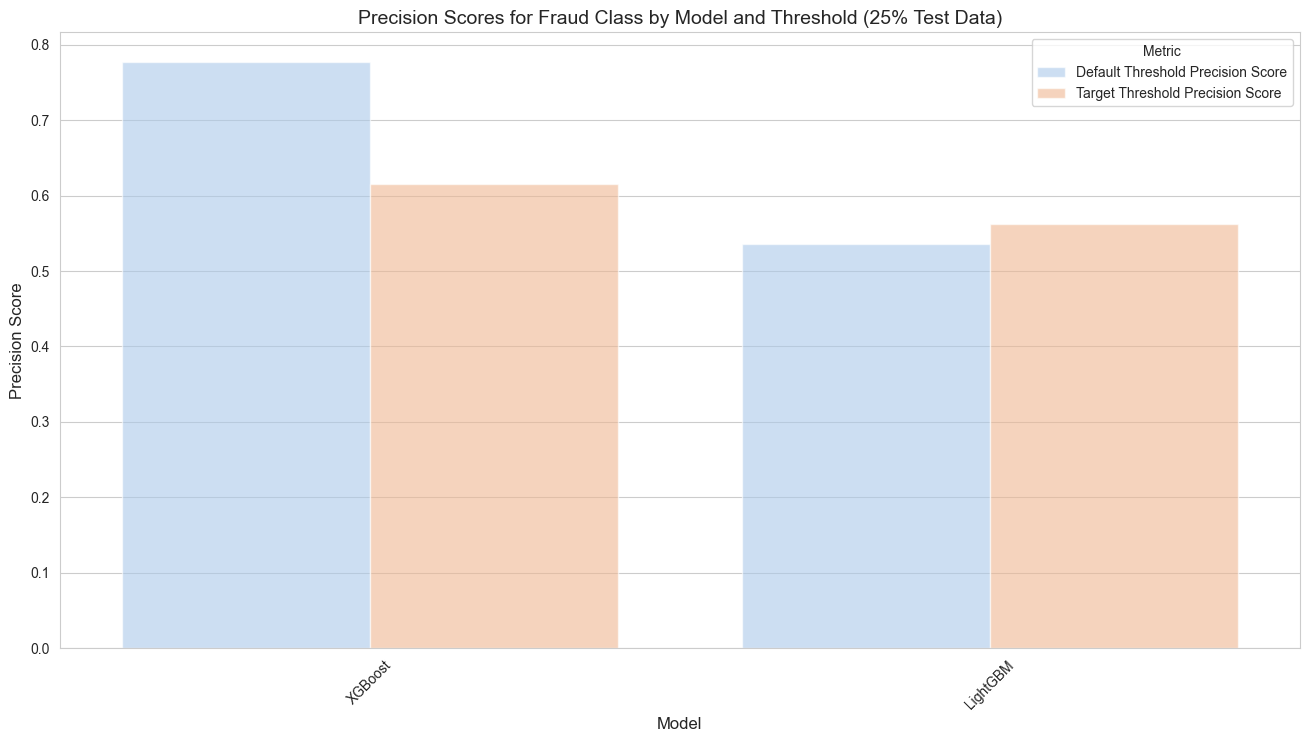

In [222]:
# Create a dataframe of the precision scores for each model
data_75 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Threshold Precision Score': [lgb_default_precision_75[1], xgb_default_precision_75[1]],
    'Target Threshold Precision Score': [lgb_target_precision_75[1], xgb_target_precision_75[1]]
})

# Plot the precision scores for each model
plot_precision_scores(data_75, suffix=' (25% Test Data)')

##### <b>Results of datasets are splited by a ratio of `9:1`

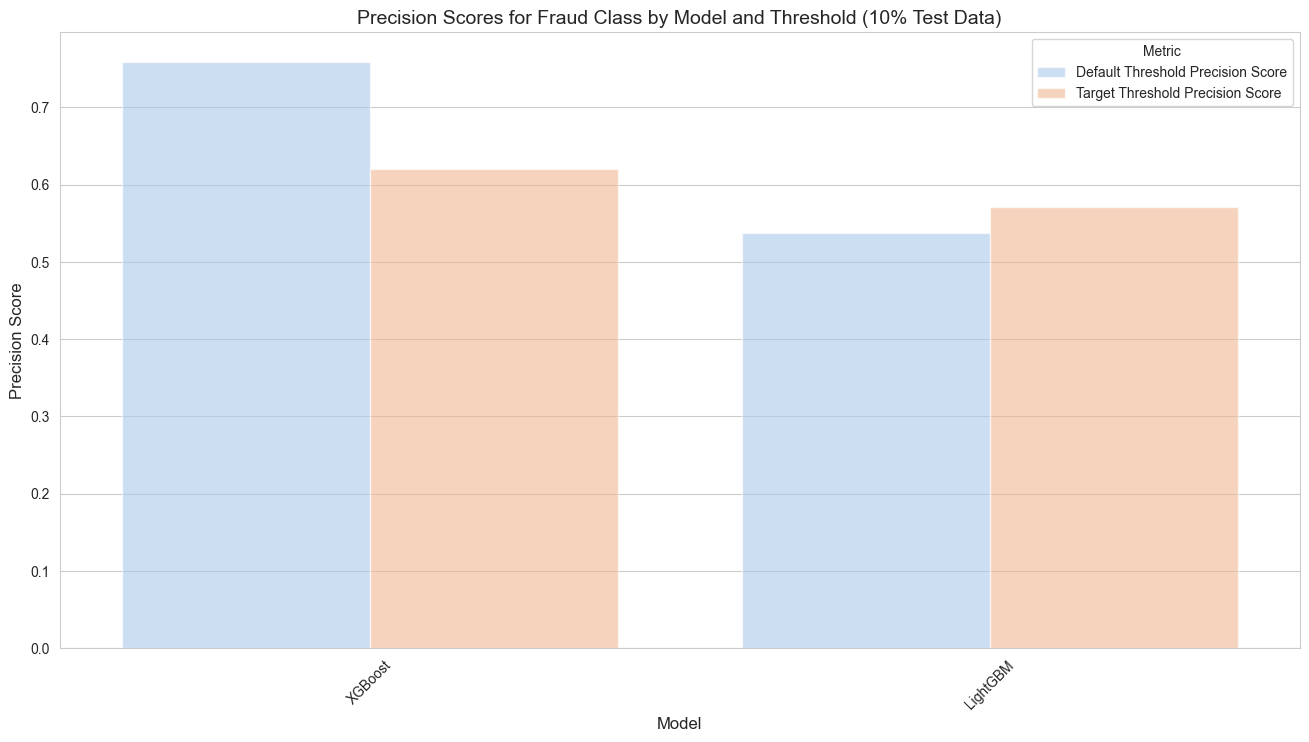

In [223]:
# Create a dataframe of the precision scores for each model
data_90 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Threshold Precision Score': [lgb_default_precision_90[1], xgb_default_precision_90[1]],
    'Target Threshold Precision Score': [lgb_target_precision_90[1], xgb_target_precision_90[1]]
})

# Plot the precision scores for each model
plot_precision_scores(data_90, suffix=' (10% Test Data)')

#### 3.5.7.5 Plotting Recall Scores for Fraud Class at Default and Target Thresholds

Plotting Recall Scores allows us to have insights into how well a model identifies actual fraudulent instances, especially when the threshold for classification is adjusted.

The recall scores at default and target thresholds are visualized using a bar plot. Each model is represented on the x-axis, and the y-axis represents recall scores. Bars are grouped to show recall at the default and target thresholds side by side.

By comparing the heights of the bars at default and target thresholds, you can observe how each model's recall changes with threshold adjustments. Models that maintain or improve recall at the target threshold are generally more desirable.

In [224]:
def plot_recall_scores(data, suffix=''):
    # Sort the data by the threshold recall score in descending order
    data = data.sort_values(by='Target Threshold Recall Score', ascending=False)

    # Reshape the data
    data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

    # Set up plot
    plt.figure(figsize=(16, 8))

    # Create grouped bar plot
    sns.barplot(
        data=data,
        x='Model',
        y='Score',
        hue='Metric',
        palette=my_palette,
        alpha=.6,
    )

    # Customize labels and legend
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Recall Score", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f"Recall Scores for Fraud Class by Model and Threshold{suffix}", fontsize=14)
    plt.legend(title="Metric", fontsize=10)

    # Display plot
    plt.show()

##### <b>Results of datasets are splited by a ratio of `6:4`

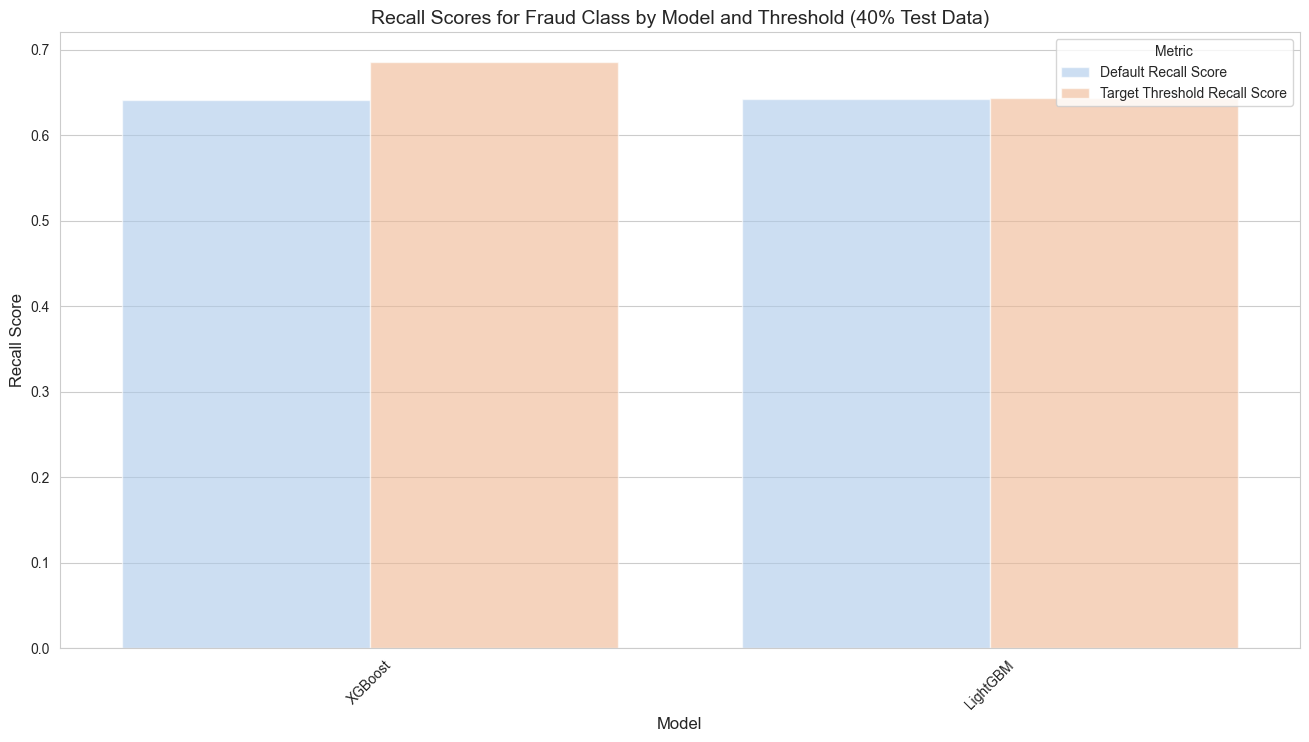

In [225]:
# Create a dataframe with the recall scores for each model
data_60 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Recall Score': [lgb_default_recall_60[1], xgb_default_recall_60[1]],
    'Target Threshold Recall Score': [lgb_target_recall_60[1], xgb_target_recall_60[1]]
})

# Plot the recall scores for each model
plot_recall_scores(data_60, suffix=' (40% Test Data)')

##### <b>Results of datasets are splited by a ratio of `75:25`

When the dataset is split into a ratio of  75:25 (75% training, 25% testing), it means that a larger portion of the data is used for training the machine learning models, leaving a smaller portion for evaluating their performance.

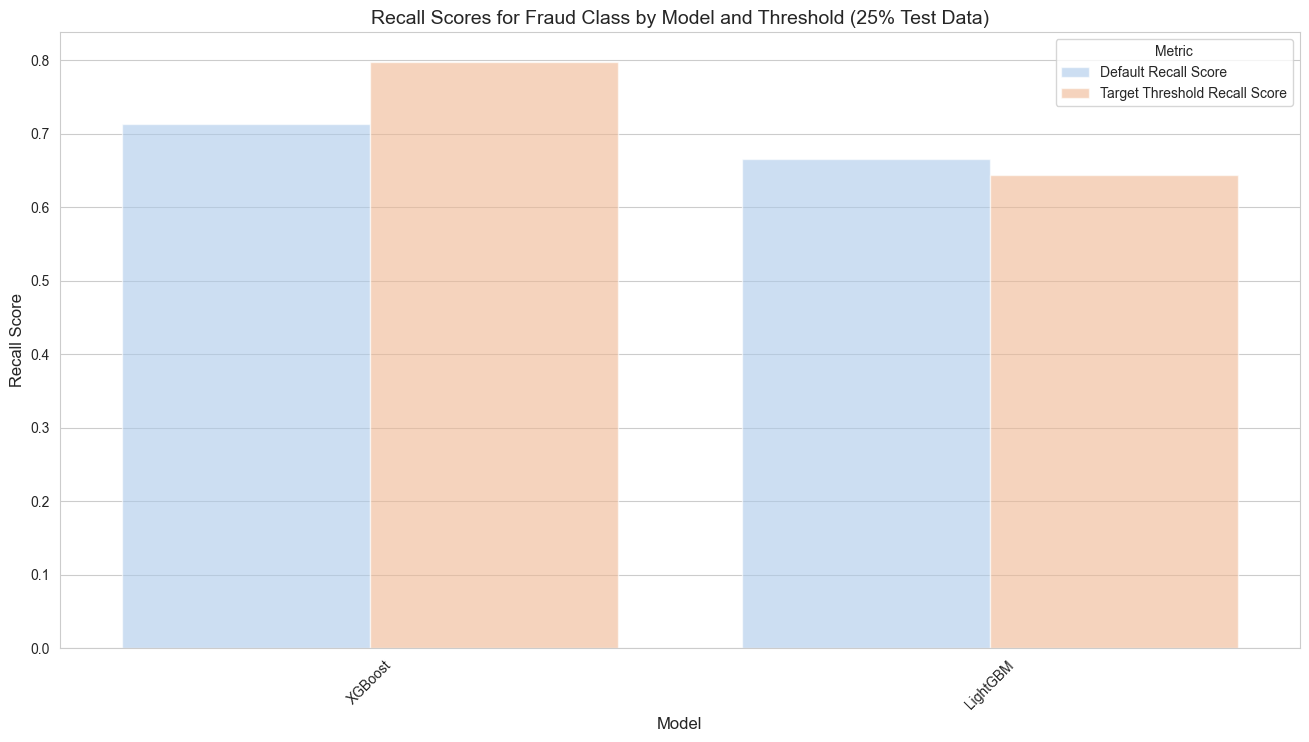

In [226]:
# Create a dataframe with the recall scores for each model
data_75 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Recall Score': [lgb_default_recall_75[1], xgb_default_recall_75[1]],
    'Target Threshold Recall Score': [lgb_target_recall_75[1], xgb_target_recall_75[1]]
})

# Plot the recall scores for each model
plot_recall_scores(data_75, suffix=' (25% Test Data)')

##### <b>Results of datasets are splited by a ratio of `9:1`

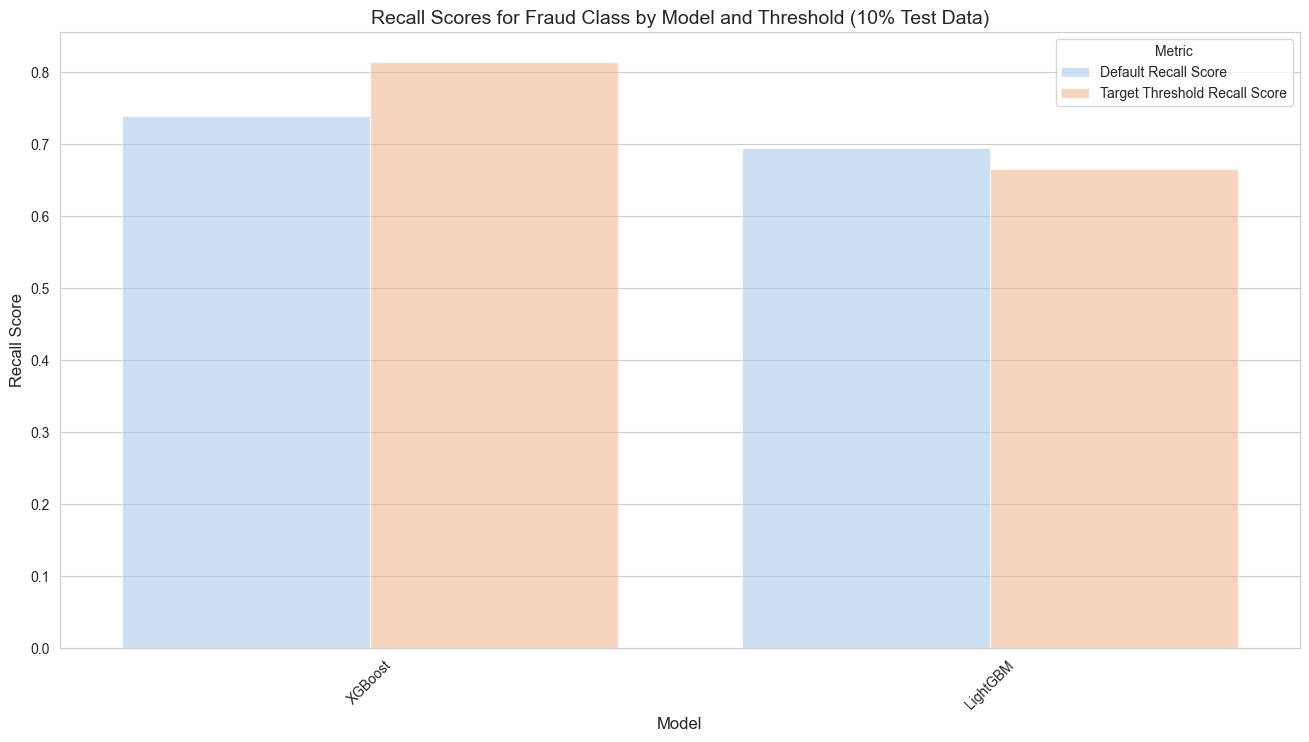

In [227]:
# Create a dataframe with the recall scores for each model
data_90 = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Default Recall Score': [lgb_default_recall_90[1], xgb_default_recall_90[1]],
    'Target Threshold Recall Score': [lgb_target_recall_90[1], xgb_target_recall_90[1]]
})

# Plot the recall scores for each model
plot_recall_scores(data_90, suffix=' (10% Test Data)')

<a id="4"></a>

# **4. Challenges and Problems**

1. *Challenge&Prblem 1*: How we collaborate
    * Since we combine all the datasets together, how to collaboration became a problem. After we discussed, we decide to create a Github private repository to collaborate and sync files. 
2. *Challenge&Problem 2*: How do we cope with x1 and x2
    * After we combinbe all the variants together, we found that Varient 3 and Varient 5 bring x1 and x2 attibutes to the data. After we read the paper of the dataset, we were still confused how to utilize the 2 attibutes. Therefore, we just drop the 2 attributes. 
3. *Challenge&Problem 3*: How do we select featuress to train and evaluate modesl
    * At the beginning, we have doubt that how we conduct our training and evaluation of the tree-based models for the fraud detection. Then, we proceed feature engineering to select most related attributes.
4. *Challenge&Problem 4*: How we deal with data imbalance
    * Fraud detecition is one of the typicalest data imbalance task of machine learning. For most of fraud detecion datasets, no fraud instances are much more than fraud instances. At the beginning, this bothered us a while. Later, we did some experiments of resampling techniques, the problem became not annoying.

<a id="5"></a>

# **5. Conclusion / Findings**

<a id="6"></a>

# **Reference**

<ul>
    <li>Jesus, S., Pombal, J., Alves, D., Cruz, A., Saleiro, P., Ribeiro, R. P., Gama, J., &amp; Bizarro, P. (2022, November 28). Turning the tables: Biased, imbalanced, dynamic tabular datasets for ML Evaluation. arXiv.org. https://arxiv.org/abs/2211.13358 </li>
    <li>Matthewmcnulty. (2023, May 16). Bank-account-fraud. Kaggle. https://www.kaggle.com/code/matthewmcnulty/bank-account-fraud</li>
</ul>